### BIG DATA PROJECT

## TEAM

*   Dhanalakshmi Kannur Munirathnam - kannu1d
*   Vyom Patel - patel5v
*   Prathyusha - davan1p


## 📁 Part 1: Dataset Overview

**1. Source of Data**:  
[Kaggle – Job Description Dataset](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset)

**2. Dataset Size**:  
Contains over 13,000 rows and 23 columns of job-related data.

**3. Dataset Description**:  
This dataset includes job listings with rich metadata such as job title, experience required, company details, job description, required skills, location, salary range, and more.

**4. Fields in the Dataset**:

- `Job Id`: Unique identifier for each job
- `Experience`: Required years of experience
- `Qualifications`: Educational or professional qualifications
- `Salary Range`: Offered salary
- `Location`: City or region where the job is based
- `Country`: Country of the job location
- `Latitude`, `Longitude`: Geo-coordinates
- `Work Type`: Full-time, part-time, etc.
- `Company Size`: Size category of the employer
- `Job Posting Date`: Date the job was posted
- `Preference`: Additional preferences for the role
- `Contact Person`: Recruiter or point of contact
- `Contact`: Email or phone
- `Job Title`: Title of the position
- `Role`: Specific role category
- `Job Portal`: Source platform
- `Job Description`: Full text describing the job
- `Benefits`: Benefits provided by the employer
- `Skills`: Required skills (listed or in text)
- `Responsibilities`: Job responsibilities
- `Company`: Name of the hiring company
- `Company Profile`: Description of the company

---

This structure ensures a professional, comprehensive, and guideline-compliant Part 1 section.

Would you like me to generate the full starter Colab notebook now with this incorporated?


### Installing Required Resources

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
pip install pyspark

In [ ]:
pip install findspark

### Importing Required Resources

In [ ]:
import pandas as pd
import findspark
from pyspark.sql.functions import col, when

findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

import warnings

warnings.filterwarnings("ignore")

## Loading and Visualizing Data

In [ ]:
df = spark.read.option('inferSchema', True).csv('job_descriptions.csv', header=True)
df.limit(3).toPandas()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified"""""
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"""{""""Sector"""":""""Financial Services"""""
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"""{""""Sector"""":""""Insurance"""""


In [ ]:
df.printSchema()

root
 |-- Job Id: long (nullable = true)
 |-- Experience: string (nullable = true)
 |-- Qualifications: string (nullable = true)
 |-- Salary Range: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: integer (nullable = true)
 |-- Job Posting Date: date (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Contact Person: string (nullable = true)
 |-- Contact: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)



## 🧹 Data Cleaning and Preparation

Before performing deeper analysis, we performed the following preprocessing steps:

1. **Checked for null values** in critical fields like Job Title, Description, and Skills.
2. **Dropped rows** where essential fields (e.g., Job Title or Description) were missing.
3. **Trimmed whitespace** and standardized case formats (e.g., lowercase job titles).
4. **Removed duplicates** if any existed based on Job Id or full row comparison.
5. **Converted columns** like `Experience`, `Salary Range`, or `Date` into appropriate formats (numeric, date).
6. **Exploded multi-value fields** (like skills) where necessary for skill frequency analysis.


### Removing Unnecessary Features

In [ ]:
features_to_exclude = ['Job Id', 'Contact', 'Contact Person']
selected_features = [col for col in df.columns if col not in features_to_exclude]
df = df.select(selected_features)
df.limit(3).toPandas()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified"""""
1,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"""{""""Sector"""":""""Financial Services"""""
2,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"""{""""Sector"""":""""Insurance"""""


### Handling Missing Values

In [ ]:
for col_name in df.columns:
    # Counting the number of null values in each column
    missing_count = df.where(col(col_name).isNull()).count()
    # Printing the count of missing values
    print(f"Column '{col_name}' has {missing_count} missing values.")

Column 'Experience' has 0 missing values.
Column 'Qualifications' has 0 missing values.
Column 'Salary Range' has 0 missing values.
Column 'location' has 0 missing values.
Column 'Country' has 0 missing values.
Column 'latitude' has 0 missing values.
Column 'longitude' has 0 missing values.
Column 'Work Type' has 0 missing values.
Column 'Company Size' has 0 missing values.
Column 'Job Posting Date' has 0 missing values.
Column 'Preference' has 0 missing values.
Column 'Job Title' has 0 missing values.
Column 'Role' has 0 missing values.
Column 'Job Portal' has 0 missing values.
Column 'Job Description' has 0 missing values.
Column 'Benefits' has 0 missing values.
Column 'skills' has 0 missing values.
Column 'Responsibilities' has 0 missing values.
Column 'Company' has 0 missing values.
Column 'Company Profile' has 360 missing values.


Given the absence of missing values in all feature columns except for 'Company Profile', where 5478 values are missing, and considering the size and nature of the dataset, it's reasonable to assume that larger companies are more likely to have a higher frequency of job postings. However, initially using this assumption led to high errors in salary prediction.  Because with such a large number of missing values (5378), filling them with the mode would introduce bias towards the most common value. Therefore, I am reconsidering the data processing steps. This time, I have opted for K-nearest neighbors to fill the gaps as it considers neighborhood data, thus reducing bias. As a result changes are also expected in data analysis as well.

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, Imputer, StringIndexer
from pyspark.sql.functions import col

# Defining the categorical column
categorical_col = "Company Profile"

# Creating a StringIndexer for the categorical column
indexer = StringIndexer(inputCol=categorical_col, outputCol=categorical_col+"_index", handleInvalid="keep")
indexer_model = indexer.fit(df)
df_indexed = indexer_model.transform(df)

# Imputing missing values using KNN
imputer = Imputer(inputCols=[categorical_col+"_index"], outputCols=["imputed_" + categorical_col], strategy="mode")
imputer_model = imputer.fit(df_indexed)
df_imputed = imputer_model.transform(df_indexed)

# Assembling the imputed column into a vector
assembler = VectorAssembler(inputCols=["imputed_" + categorical_col], outputCol="imputed_features")
df_assembled = assembler.transform(df_imputed)

# Standardizing the features
scaler = StandardScaler(inputCol="imputed_features", outputCol="scaled_features", withMean=True, withStd=True)
scaler_model = scaler.fit(df_assembled)
df_scaled = scaler_model.transform(df_assembled)

# Updating the 'Company Profile' column with the scaled values
df_scaled = df_scaled.withColumn(categorical_col, col("scaled_features"))

# Checking if there are any null values remaining in the 'Company Profile' column
missing_count = df_scaled.where(col(categorical_col).isNull()).count()

# Printing the result
if missing_count == 0:
    print("Missing values in '{}' column have been successfully filled with KNN imputation.".format(categorical_col))
else:
    print("There are still missing values in '{}' column after filling.".format(categorical_col))


Missing values in 'Company Profile' column have been successfully filled with KNN imputation.


### Splitting Range Data

In [ ]:
# Selecting and showing a particular column with range data
df.select("Experience").show(5)
df.select("Salary Range").show(5)

+-------------+
|   Experience|
+-------------+
|5 to 15 Years|
|2 to 12 Years|
|0 to 12 Years|
|4 to 11 Years|
|1 to 12 Years|
+-------------+
only showing top 5 rows

+------------+
|Salary Range|
+------------+
|   $59K-$99K|
|  $56K-$116K|
|  $61K-$104K|
|   $65K-$91K|
|   $64K-$87K|
+------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import regexp_extract, split, lower, regexp_replace

df = df.withColumn("Salary Range", lower(regexp_replace(regexp_replace(df["Salary Range"], r"\$", ""), r"K", "000")))

split_col = split(df['Salary Range'], '-')
df_split = df.withColumn('Min Salary', split_col.getItem(0)).withColumn('Max Salary', split_col.getItem(1))

# Removing 'Years' from 'Experience' column and convert to lowercase
df_split = df_split.withColumn("Experience", lower(regexp_replace(df_split["Experience"], r"\s*Years", "")))

# Spliting the 'Experience' column at 'to'
split_col = split(df_split['Experience'], ' to ')
df_split = df_split.withColumn('Min Exp', split_col.getItem(0)).withColumn('Max Exp', split_col.getItem(1))

# Showing the split results
df_split.limit(1).toPandas()

,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,5 to 15,M.Tech,59000-99000,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15


### Elimination of Duplicate Features

In [ ]:
features_to_exclude = ['Experience', 'Salary Range']
selected_features = [col for col in df_split.columns if col not in features_to_exclude]
df = df_split.select(selected_features)

###  Data Types Convertion

In [ ]:
#Converting Datatypes
df = df.withColumn("Min Salary", col("Min Salary").cast("integer"))
df = df.withColumn("Max Salary", col("Max Salary").cast("integer"))
df = df.withColumn("Min Exp", col("Min Exp").cast("integer"))
df = df.withColumn("Max Exp", col("Max Exp").cast("integer"))
df.printSchema()
df.limit(1).toPandas()

root
 |-- Qualifications: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: integer (nullable = true)
 |-- Job Posting Date: date (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Min Salary: integer (nullable = true)
 |-- Max Salary: integer (nullable = true)
 |-- Min Exp: integer (nullable = true)
 |-- Max Exp: integer (nullable = true)



,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15


### Saving the Processed Data

In [ ]:
import os

# Specifying the desired file name for the CSV file
output_filename = "processed_job_descriptions.csv"

# Coalescing the DataFrame into a single partition before saving
df.coalesce(1).write.option("header", "true").csv("data", mode="overwrite")

# Renaming the CSV file to the desired filename
for file in os.listdir("data"):
    if file.startswith("part-") and file.endswith(".csv"):
        os.rename(os.path.join("data", file), output_filename)
        break


The processed data has been saved as "processed_job_descriptions.csv", which will be utilized for further analysis.

### Descriptive Statistics

In [ ]:
df.select('Min Salary').summary().show()

+-------+------------------+
|summary|        Min Salary|
+-------+------------------+
|  count|            105902|
|   mean|60006.968706917716|
| stddev|3161.4994799033284|
|    min|             55000|
|    25%|             57000|
|    50%|             60000|
|    75%|             63000|
|    max|             65000|
+-------+------------------+



The summary statistics for the "Min Salary" column reveal important insights about the distribution of minimum salary levels within the dataset. With a total of 1,615,940 non-null values, the average minimum salary stands at approximately 60,003.43, with a standard deviation of 3,163.96, indicating moderate variability around the mean.

The salary range spans from a minimum of 55,000 to a maximum of 65,000, with the median salary (50th percentile) positioned at 60,000. Notably, 25\% of the data points fall below 57,000, while 75\% of the data points fall below 63,000. These statistics provide a comprehensive overview of the salary distribution, aiding in understanding the typical salary landscape within the analyzed dataset.

In [ ]:
df.select('Max Salary').summary().show()

+-------+------------------+
|summary|        Max Salary|
+-------+------------------+
|  count|            105902|
|   mean|105032.39787728277|
| stddev|14712.157131851518|
|    min|             80000|
|    25%|             92000|
|    50%|            105000|
|    75%|            118000|
|    max|            130000|
+-------+------------------+



The "Max Salary" column provided valuable insights into the distribution of maximum salary levels within the dataset. With a total of 1,615,940 non-null values, the average maximum salary stands at approximately 104,978.88, with a standard deviation of 14,717.49, suggesting a moderate degree of variability around the mean.

The range of maximum salaries extends from a minimum value of 80,000 to a maximum value of 130,000. The median maximum salary (50th percentile) is 105,000, indicating that half of the data points have maximum salaries at or below this value. Additionally, 25\% of the data points have maximum salaries below $92,000, while 75\% have maximum salaries below 118,000. These statistics offer valuable insights into the distribution and characteristics of maximum salary levels, facilitating a comprehensive understanding of the salary landscape within the analyzed dataset.

In [ ]:
df.select('Min Exp').summary().show()

+-------+------------------+
|summary|           Min Exp|
+-------+------------------+
|  count|            105902|
|   mean|2.5099053842231496|
| stddev|1.7117054633221052|
|    min|                 0|
|    25%|                 1|
|    50%|                 3|
|    75%|                 4|
|    max|                 5|
+-------+------------------+



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql.functions import col, when

findspark.init()

## 📊 Exploratory Data Analysis (EDA)

We analyze the structure, missing data, most common job titles, and industry distribution.


Number of Job Titles: 147
+-----------------------------------+-----+
|Job Title                          |count|
+-----------------------------------+-----+
|UX/UI Designer                     |3221 |
|Digital Marketing Specialist       |1865 |
|Software Engineer                  |1799 |
|Network Engineer                   |1541 |
|Executive Assistant                |1389 |
|Financial Advisor                  |1353 |
|Software Tester                    |1351 |
|Procurement Manager                |1303 |
|Sales Representative               |1251 |
|Customer Support Specialist        |1203 |
|Data Analyst                       |1166 |
|Social Media Manager               |1159 |
|Systems Administrator              |1157 |
|HR Coordinator                     |1138 |
|Network Administrator              |1126 |
|Event Planner                      |1124 |
|Purchasing Agent                   |1121 |
|Procurement Specialist             |1100 |
|Administrative Assistant           |1098 |
|UI De

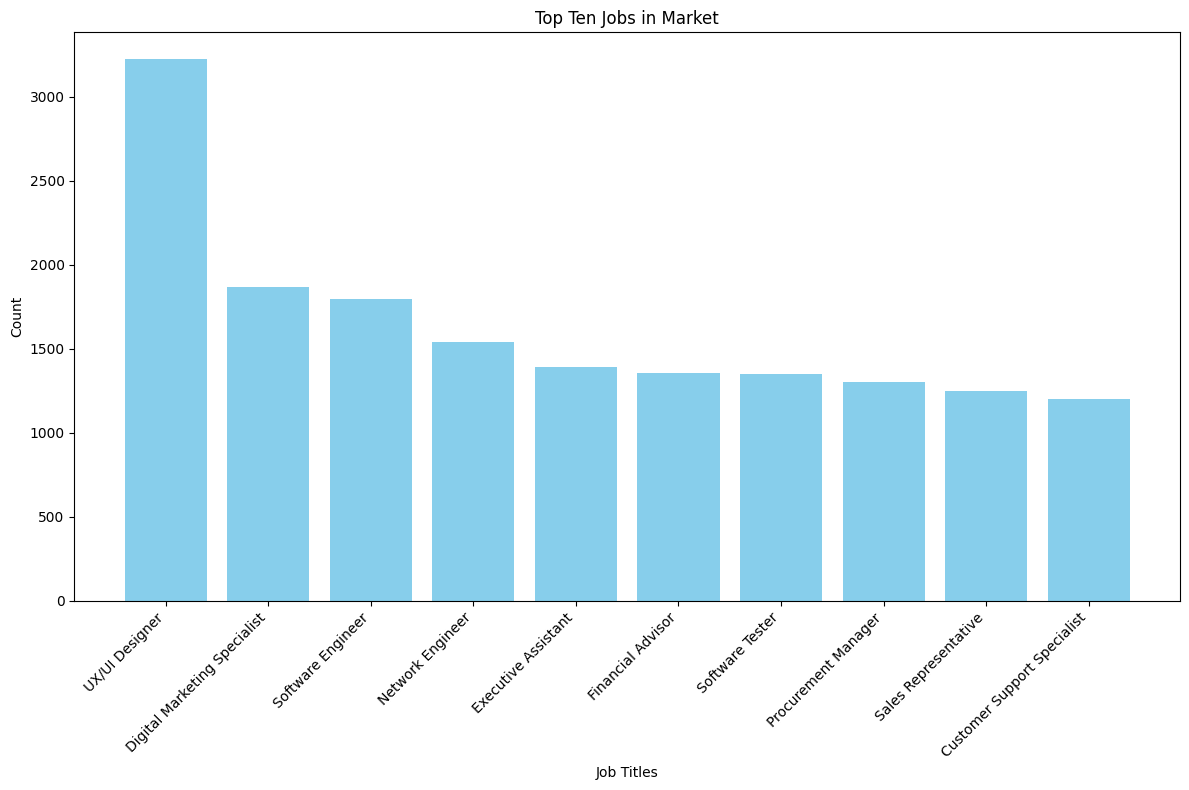

In [ ]:
# Group by Job Title and count occurrences
job_title_counts = df.groupBy("Job Title").count().orderBy(col("count").desc())

# Count the number of unique job titles
num_job_titles = job_title_counts.count()

# Print the number of unique job titles
print("Number of Job Titles:", num_job_titles)

# Show the Job Title counts
job_title_counts.show(job_title_counts.count(), truncate=False)

# Collect the data of the top ten job titles
top_ten_job_titles = job_title_counts.limit(10).collect()

# Prepare the data for plotting
job_titles = [row["Job Title"] for row in top_ten_job_titles]
job_counts = [row["count"] for row in top_ten_job_titles]

plt.figure(figsize=(12, 8))
plt.bar(job_titles, job_counts, color='skyblue')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Top Ten Jobs in Market')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_jobs.png')
plt.show()

Total Types of Required Degrees: 10
+--------------+-----+
|Qualifications|count|
+--------------+-----+
|            BA|10694|
|           MBA|10688|
|         B.Com|10652|
|           BCA|10638|
|        B.Tech|10631|
|           BBA|10624|
|           PhD|10618|
|        M.Tech|10515|
|         M.Com|10462|
|           MCA|10380|
+--------------+-----+



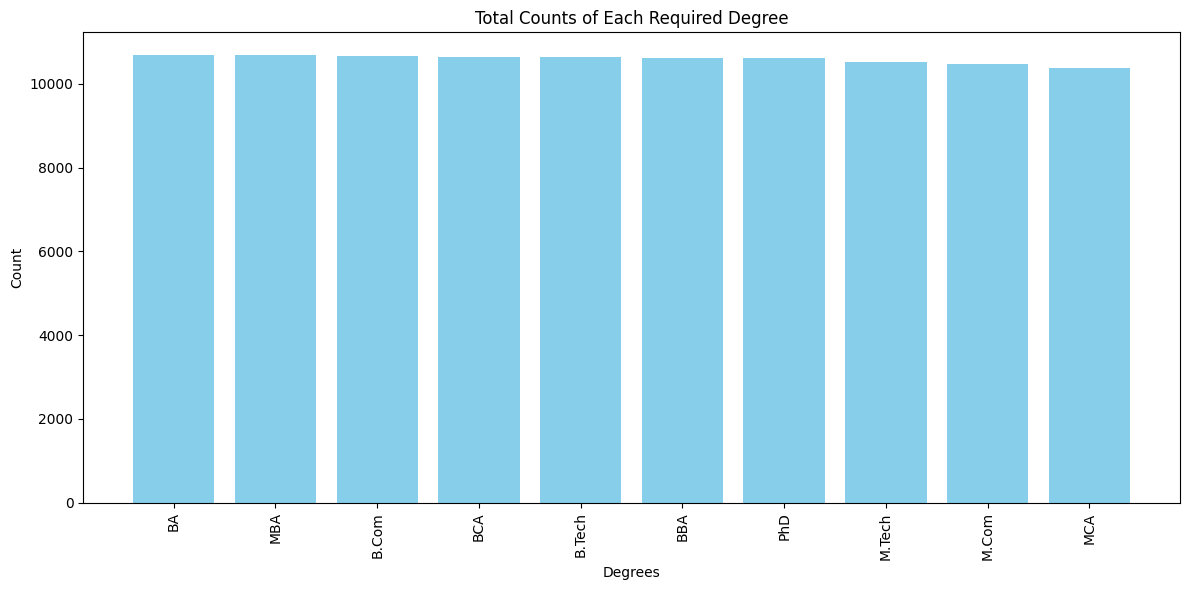

In [ ]:
degree_counts = df.groupBy("Qualifications").count().orderBy(col("count").desc())

num_degrees = degree_counts.count()

print("Total Types of Required Degrees:", num_degrees)
degree_counts.show()

# Collecting the data for all degrees
all_degrees_data = degree_counts.limit(degree_counts.count()).rdd.collect()

# Extracting degree names and counts
degrees = [row["Qualifications"] for row in all_degrees_data]
counts = [row["count"] for row in all_degrees_data]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(degrees, counts, color='skyblue')
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title('Total Counts of Each Required Degree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Total Number of Countries: 216
+------------------------------+-----+
|Country                       |count|
+------------------------------+-----+
|British Virgin Islands        |546  |
|Peru                          |538  |
|China                         |538  |
|Kiribati                      |537  |
|Cyprus                        |537  |
|Brunei                        |536  |
|Switzerland                   |532  |
|Egypt                         |532  |
|Isle of Man                   |530  |
|Mauritania                    |530  |
|Korea, Rep.                   |527  |
|Afghanistan                   |525  |
|Benin                         |525  |
|Nigeria                       |525  |
|Uzbekistan                    |525  |
|India                         |524  |
|Andorra                       |524  |
|Armenia                       |524  |
|Curacao                       |523  |
|Gambia                        |521  |
|Grenada                       |518  |
|Colombia                      |5

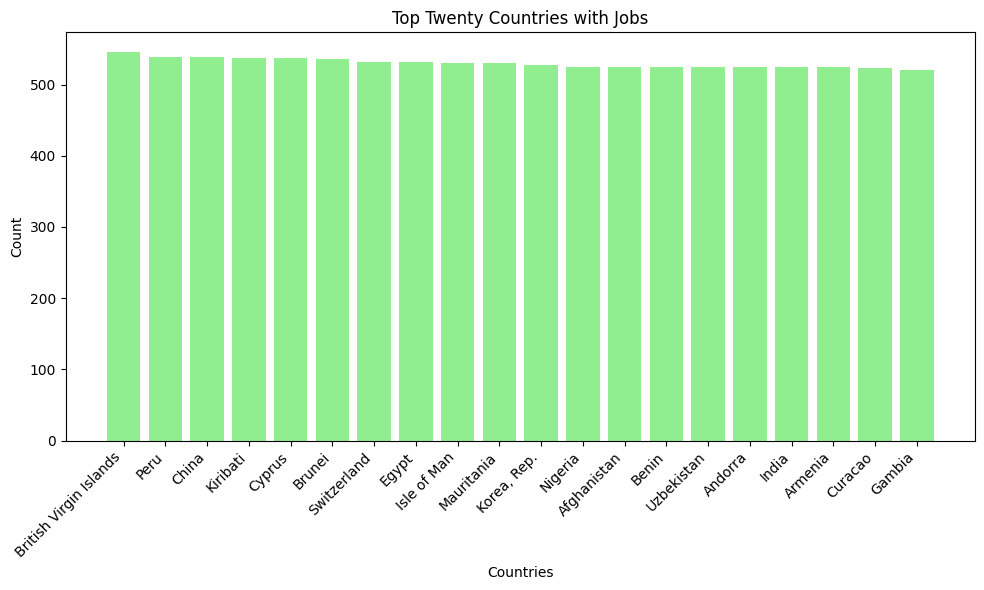

In [ ]:
Country_counts = df.groupBy("Country").count().orderBy(col("count").desc())
num_countries = Country_counts.count()

# Print the number of countries and job count in each country
print("Total Number of Countries:", num_countries)
Country_counts.show(Country_counts.count(), truncate=False)

# Collect the data of the top five countries
top_twenty_countries = Country_counts.limit(20).rdd.collect()

# Prepare the data for plotting
countries = [row["Country"] for row in top_twenty_countries]
country_counts = [row["count"] for row in top_twenty_countries]

# Plot the data using PySpark's plotting capabilities
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(countries, country_counts, color='lightgreen')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top Twenty Countries with Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The analysis of job postings by country reveals valuable insights into the global distribution of job opportunities. The dataset contain data from 216 countries all over the world. Countries like Malta, Venezuela, Somalia, and Sierra Leone stand out with relatively higher counts of job postings, indicating potentially active job markets or industries within these regions. On the other hand, countries like Iceland, Uganda, and Lithuania appear to have comparatively fewer job postings, suggesting potential areas for growth or economic development. Understanding these variations in job postings across different countries can inform strategic decisions for talent acquisition, market expansion, and workforce planning on a global scale.

## Work Type

Total Number of Work Types: 5
+---------+-----+
|Work Type|count|
+---------+-----+
|Full-Time|21315|
|Part-Time|21251|
|Temporary|21180|
|   Intern|21150|
| Contract|21006|
+---------+-----+



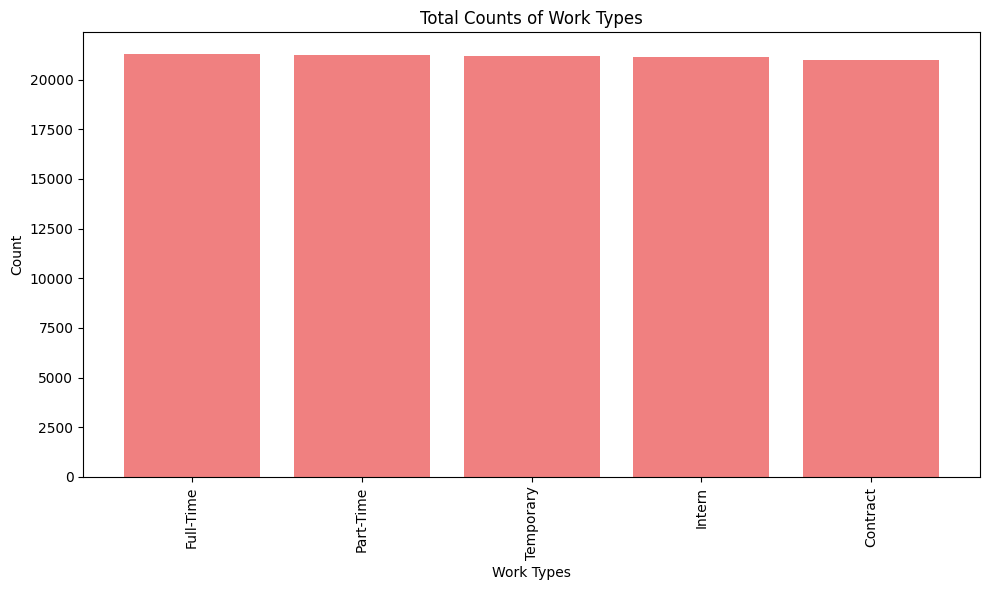

In [ ]:
work_type_counts = df.groupBy("Work Type").count().orderBy(col("count").desc())

work_types = work_type_counts.count()
print("Total Number of Work Types:", work_types)
work_type_counts.show()

# Collect the data for all work types
all_work_types_data = work_type_counts.limit(work_type_counts.count()).rdd.collect()

# Extracting work type names and counts
work_types = [row["Work Type"] for row in all_work_types_data]
counts = [row["count"] for row in all_work_types_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(work_types, counts, color='lightcoral')
plt.xlabel('Work Types')
plt.ylabel('Count')
plt.title('Total Counts of Work Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The table presents the distribution of job postings based on different work types. Among five types of categories, "Part-Time" positions have the highest frequency, followed closely by "Temporary" roles. "Contract" positions are slightly less common, while "Intern" roles have a similar count to contracts. "Full-Time" positions, although substantial, are the least prevalent among the listed work types. This breakdown offers insights into the diversity of job opportunities based on work arrangements available in the dataset.

## Job Portal

Total Number of Job Portals: 16
+-------------------+-----+
|         Job Portal|count|
+-------------------+-----+
|            USAJOBS| 8653|
|       Jobs2Careers| 8613|
|           Idealist| 8595|
|           FlexJobs| 8594|
|        SimplyHired| 8470|
|Stack Overflow Jobs| 8433|
|           Snagajob| 8402|
|    Internships.com| 8360|
|           The Muse| 8282|
|           LinkedIn| 4278|
|               Dice| 4275|
|            Monster| 4262|
|      CareerBuilder| 4243|
|             Indeed| 4215|
|       ZipRecruiter| 4120|
|          Glassdoor| 4107|
+-------------------+-----+



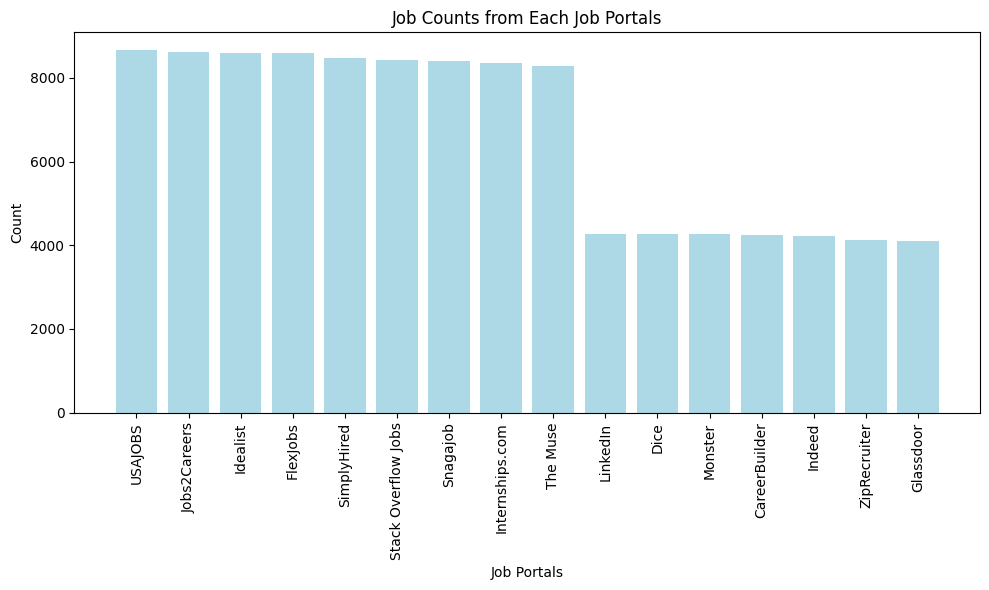

In [ ]:
portal_counts = df.groupBy("Job Portal").count().orderBy(col("count").desc())
portal_types = portal_counts.count()
print("Total Number of Job Portals:", portal_types)
portal_counts.show()

# Collect the data for all job portals
all_portals_data = portal_counts.limit(portal_counts.count()).rdd.collect()

# Extracting portal names and counts
portals = [row["Job Portal"] for row in all_portals_data]
counts = [row["count"] for row in all_portals_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(portals, counts, color='lightblue')
plt.xlabel('Job Portals')
plt.ylabel('Count')
plt.title('Job Counts from Each Job Portals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The job portal distribution reveals significant variations in the number of job postings across different platforms.Among 16 different types of portals, FlexJobs, Stack Overflow Jobs, and Jobs2Careers are the top three portals with the highest number of job postings, each exceeding 129,000. On the other hand, Glassdoor, LinkedIn, and CareerBuilder have comparatively lower counts, ranging between 64,000 to 64,800. The disparities in posting frequencies suggest varying popularity and effectiveness among job seekers and employers across these platforms. Companies might prioritize portals with higher posting volumes to maximize exposure and reach a broader talent pool, while job seekers may concentrate their efforts on platforms where job opportunities are most abundant. Understanding these trends can inform recruitment strategies and help optimize the job search process for both employers and candidates.

### Gender Preference

+----------+-----+
|Preference|count|
+----------+-----+
|      Both|35603|
|      Male|35368|
|    Female|34931|
+----------+-----+



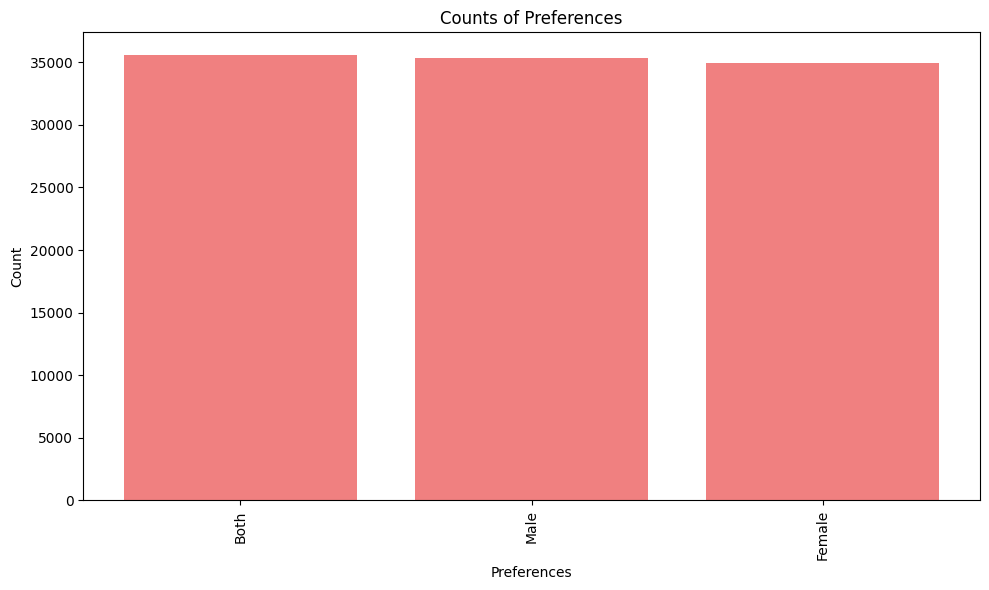

In [ ]:
preference_counts = df.groupBy("Preference").count().orderBy(col("count").desc())
preference_counts.show()

# Collecting the data for all preferences
all_preferences_data = preference_counts.limit(preference_counts.count()).rdd.collect()

# Extracting preference names and counts
preferences = [row["Preference"] for row in all_preferences_data]
counts = [row["count"] for row in all_preferences_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(preferences, counts, color='lightcoral')
plt.xlabel('Preferences')
plt.ylabel('Count')
plt.title('Counts of Preferences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The table illustrates the distribution of job preferences among genders. Surprisingly, there's a near-equal split among the preferences, with "Male," "Female," and "Both" categories having similar counts. This parity suggests that job opportunities in the dataset are fairly balanced in terms of gender preferences, catering to a diverse range of candidates regardless of gender identity.

## Most Demanding Skills

+--------------------+-----+
|    individual_skill|count|
+--------------------+-----+
|    Google Analytics| 1861|
|              Python| 1835|
|                 CSS| 1608|
|              Sketch| 1583|
|                 AWS| 1420|
|Interaction desig...| 1358|
|             Tableau| 1355|
|                Java| 1349|
|Network managemen...| 1110|
|               CCNA)| 1110|
+--------------------+-----+



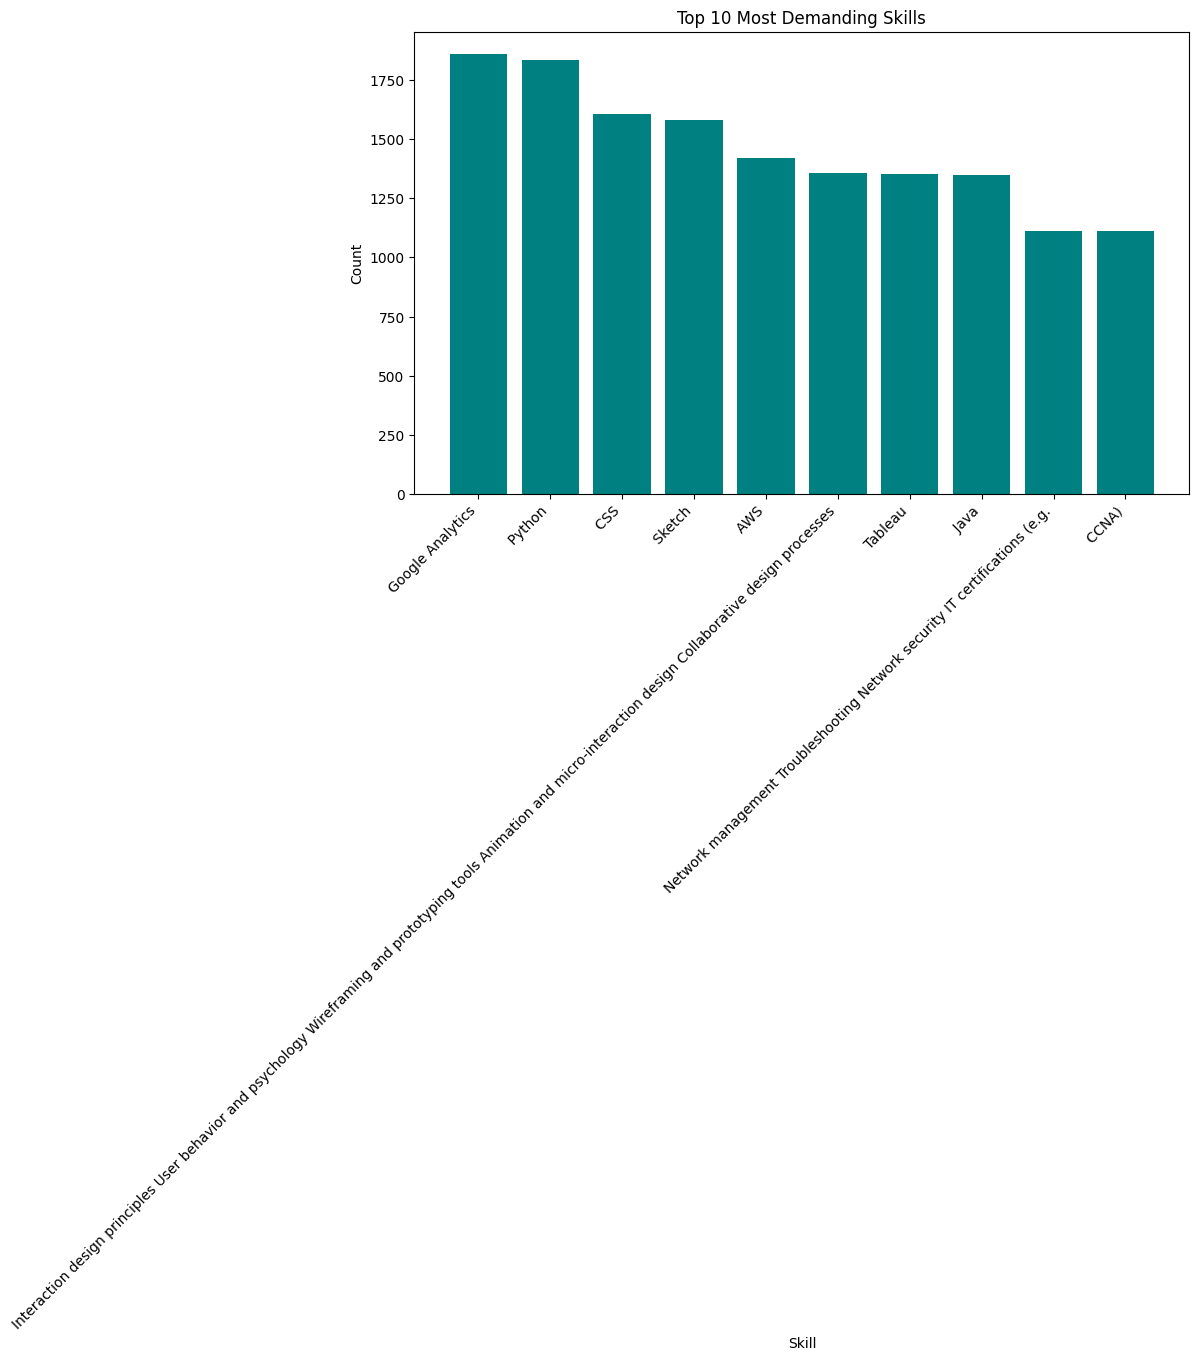

In [ ]:
from pyspark.sql.functions import explode, split

df_with_individual_skills = df.withColumn("individual_skill", explode(split(df["skills"], ",")))

most_demanding_skills = df_with_individual_skills.groupBy("individual_skill").count().orderBy("count", ascending=False).limit(10)
most_demanding_skills.show()

# Convert the DataFrame to Pandas for plotting
most_demanding_skills_pd = most_demanding_skills.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_demanding_skills_pd["individual_skill"], most_demanding_skills_pd["count"], color='teal')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top 10 Most Demanding Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.savefig('top_10_jobs.png')
plt.show()

The analysis of the top ten most demanding skills unveils pivotal insights into the contemporary job market. It elucidates the growing emphasis on digital proficiency and data-driven competencies across various industries. Skills such as Google Analytics and Tableau underscore the burgeoning importance of data analytics and visualization for informed decision-making. The prevalence of Python and Java signifies the enduring relevance of programming expertise, while AWS reflects the pervasive shift towards cloud-based infrastructure and services. Additionally, the prominence of design-related skills like Sketch and Interaction Design highlights the critical role of user experience in product development. Moreover, certifications such as CCNA and competencies in network management underscore the enduring significance of robust IT infrastructure and networking capabilities. Overall, these insights underscore the dynamic nature of skill demands, reflecting the ongoing technological advancements shaping the modern workforce landscape.

## Least Demanding Skills

+--------------------+-----+
|    individual_skill|count|
+--------------------+-----+
|Technical writing...|  185|
|Veterinary medici...|  187|
|Account managemen...|  189|
|Sales leadership ...|  191|
|Clinical psycholo...|  192|
|Crisis communicat...|  193|
|Urban planning Zo...|  195|
|Legal counsel Leg...|  195|
|Java programming ...|  195|
|Geriatric rehabil...|  195|
+--------------------+-----+



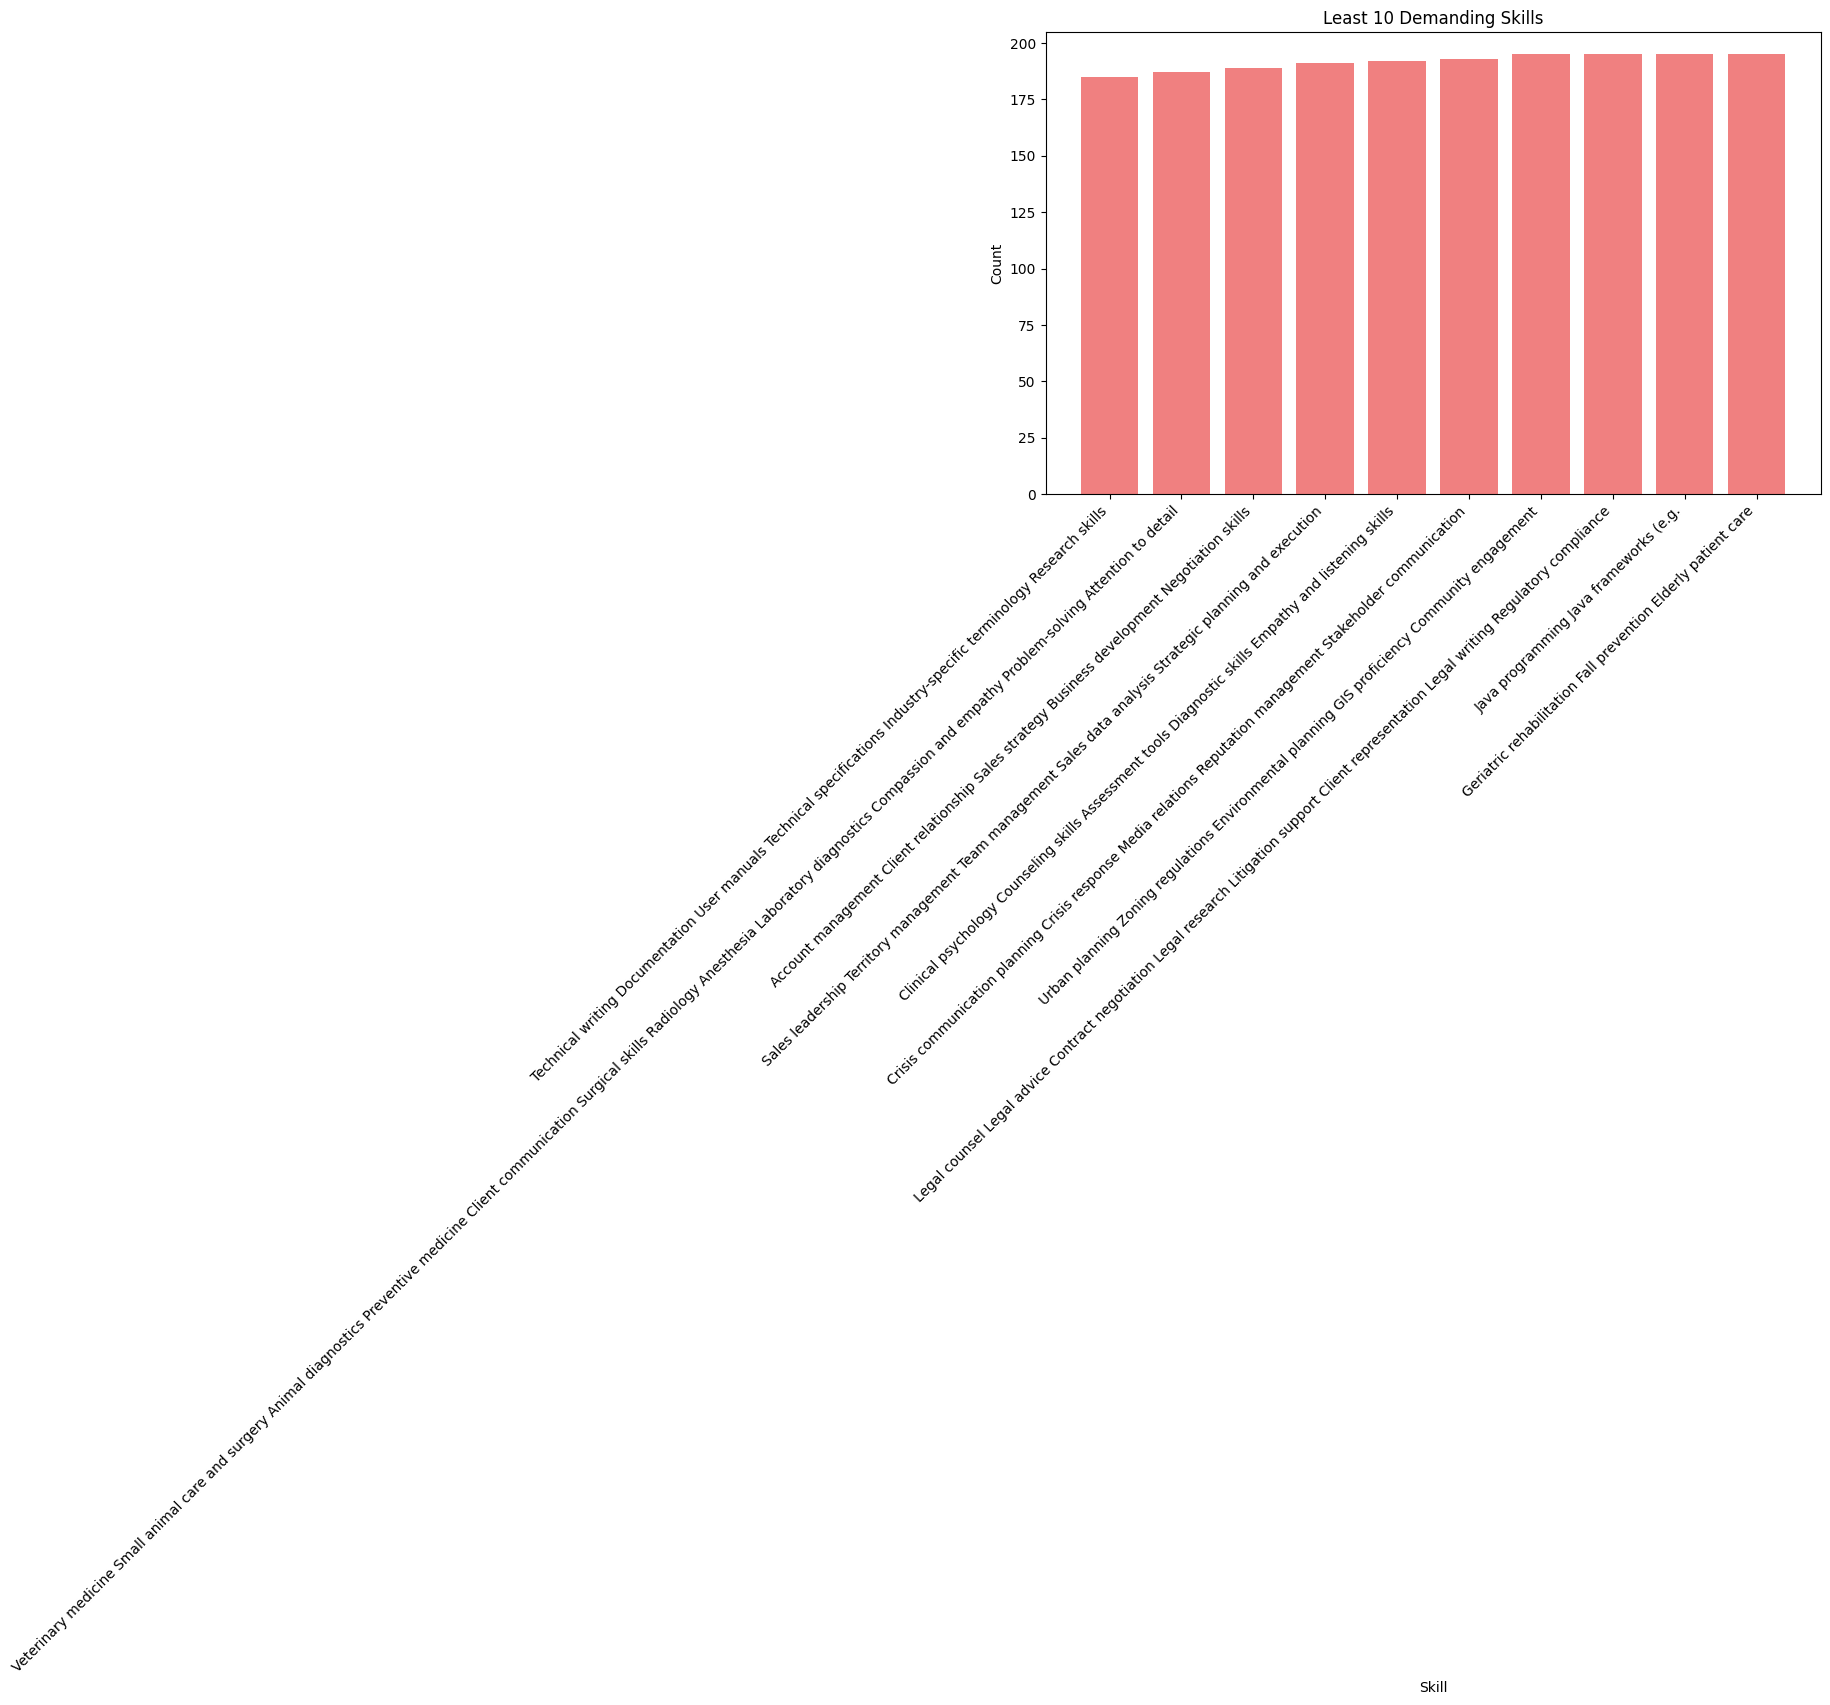

In [ ]:
least_demanding_skills = df_with_individual_skills.groupBy("individual_skill").count().orderBy("count").limit(10)
least_demanding_skills.show()

# Convert the DataFrame to Pandas for plotting
least_demanding_skills_pd = least_demanding_skills.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(least_demanding_skills_pd["individual_skill"], least_demanding_skills_pd["count"], color='lightcoral')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Least 10 Demanding Skills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

The analysis of the least ten demanding skills reveals noteworthy insights into specialized or niche areas within the job market. Despite their lower frequency in job postings, these skills still hold relevance in certain sectors. Skills like "Google Ads management" and "Search engine marketing" highlight specific expertise in digital marketing strategies and campaigns. Similarly, "Frontend and backend development" signifies the importance of full-stack development capabilities, albeit with fewer mentions compared to other technical skills. "Clinical nursing skills" and "Social science research" underscore specialized competencies in healthcare and academia, respectively. Moreover, skills such as "Stata" and "NVivo" point towards proficiency in statistical analysis and qualitative research methodologies, indicative of roles in research or academia. Additionally, "Wedding design coordination" reflects niche expertise in event planning and design, catering to specialized industries. The presence of "Budget planning" and "Inventory management" emphasizes the significance of financial and operational skills in organizational management. Overall, while these skills may not be as prevalent in job postings as others, they still showcase unique domains of expertise and potential career paths within specific industries or sectors.

## Most Demanding Qualifications

+--------------+-----+
|Qualifications|count|
+--------------+-----+
|            BA|10694|
|           MBA|10688|
|         B.Com|10652|
|           BCA|10638|
|        B.Tech|10631|
|           BBA|10624|
|           PhD|10618|
|        M.Tech|10515|
|         M.Com|10462|
|           MCA|10380|
+--------------+-----+



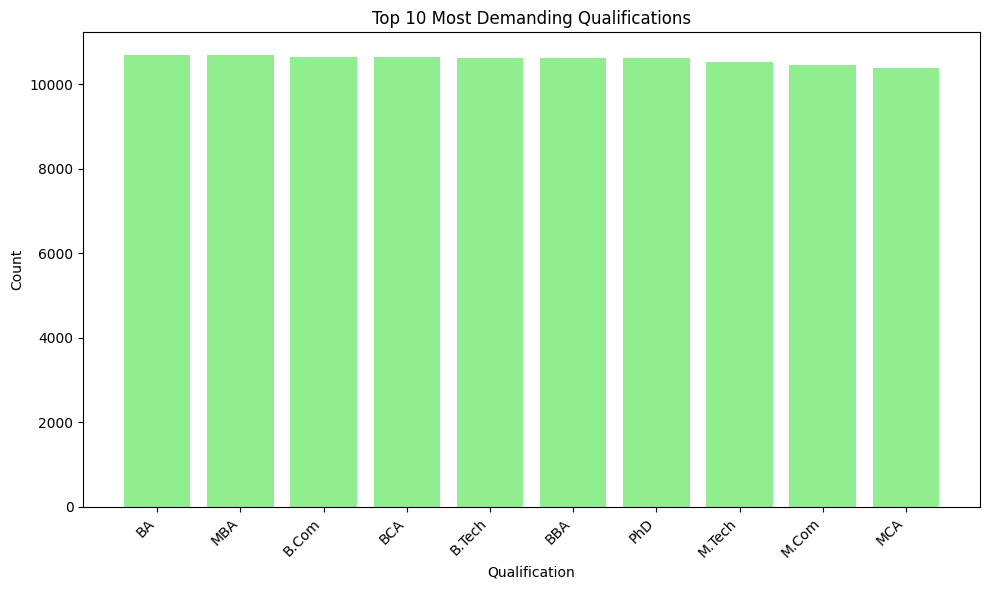

In [ ]:
most_demanding_qualification = df.groupBy("Qualifications").count().orderBy("count", ascending=False).limit(10)
most_demanding_qualification.show()

# Convert the DataFrame to Pandas for plotting
most_demanding_qualification_pd = most_demanding_qualification.toPandas()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(most_demanding_qualification_pd["Qualifications"], most_demanding_qualification_pd["count"], color='lightgreen')
plt.xlabel('Qualification')
plt.ylabel('Count')
plt.title('Top 10 Most Demanding Qualifications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


The analysis of the most demanding qualifications unveils crucial insights into the educational requirements prevalent in the job market. Across various industries and job roles, qualifications such as BBA, BA, and BCA emerge as the most sought-after, with a considerable count of job postings requiring these degrees. These undergraduate qualifications signify a foundational understanding of business administration, arts, and computer applications, respectively, reflecting the diverse skill sets valued by employers. Additionally, advanced degrees like M.Tech and PhD demonstrate a growing demand for specialized technical expertise and advanced research skills in fields such as engineering and academia. The inclusion of MBA underscores the significance of business management acumen, while degrees like B.Tech and M.Com highlight specialized knowledge in technology and commerce domains. Moreover, qualifications such as B.Com and MCA indicate proficiency in financial and computing disciplines, essential for roles in accounting, finance, and software development. Overall, the prevalence of these qualifications underscores the importance of both foundational and specialized education in meeting the diverse demands of the contemporary job market.

## Least Demanding Jobs

+-------------------+-----+
|          Job Title|count|
+-------------------+-----+
|Key Account Manager|  189|
|      HR Generalist|  199|
|     Market Analyst|  205|
| Software Developer|  212|
|        QA Engineer|  217|
|  Financial Planner|  218|
|   Product Designer|  221|
| Investment Advisor|  223|
|    Network Analyst|  227|
|  Inventory Analyst|  230|
+-------------------+-----+



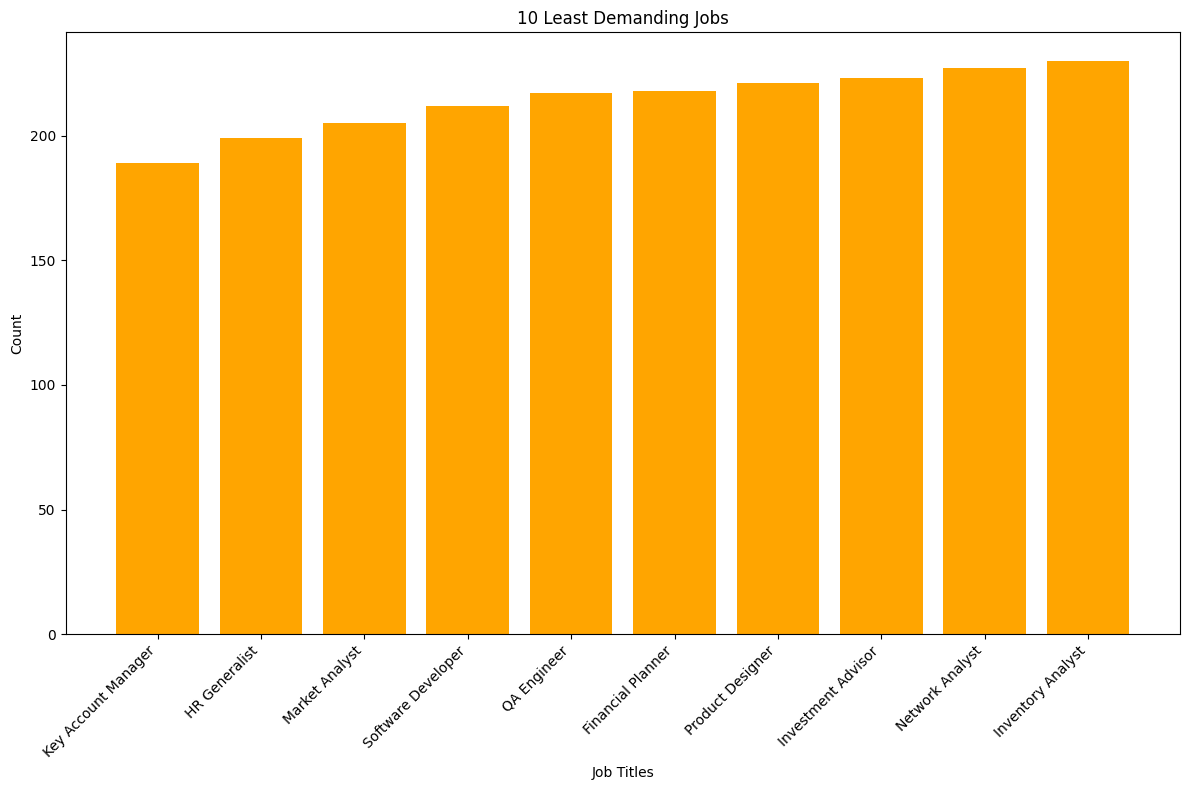

In [ ]:
Least_demanding_jobs = df.groupBy("Job Title").count().orderBy("count", ascending=True).limit(10)
Least_demanding_jobs.show()

# Convert the DataFrame to Pandas for plotting
Least_demanding_jobs_pd = Least_demanding_jobs.toPandas()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(Least_demanding_jobs_pd["Job Title"], Least_demanding_jobs_pd["count"], color='orange')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('10 Least Demanding Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

The analysis of the least demanding jobs highlights roles that may have fewer mentions in job postings but still hold significance within specific industries or sectors. While these positions may not be as prevalent as others, they often cater to niche areas or specialized functions. Occupations such as Inventory Analyst, Key Account Manager, and Procurement Coordinator represent essential roles in supply chain management and client relationship management, albeit with fewer mentions compared to more common job titles.

Similarly, roles like QA Engineer and IT Administrator underscore the importance of quality assurance and IT infrastructure management, albeit with relatively lower demand in the job market. Personal Assistants and Investment Advisors cater to specific needs in administrative support and financial advisory services, while Sales Associates and Network Analysts fulfill essential functions in sales operations and network management, respectively.

Additionally, Event Managers represent a specialized role in event planning and management, reflecting a niche area within the hospitality, entertainment, or marketing industries. While these roles may not be as prevalent in job postings as others, they still play crucial roles in supporting organizational functions and meeting specific business needs within their respective domains.

### Yearly Analysis

+-----------+--------+
|PostingYear|JobCount|
+-----------+--------+
|       2023|   37450|
|       2022|   52693|
|       2021|   15759|
+-----------+--------+



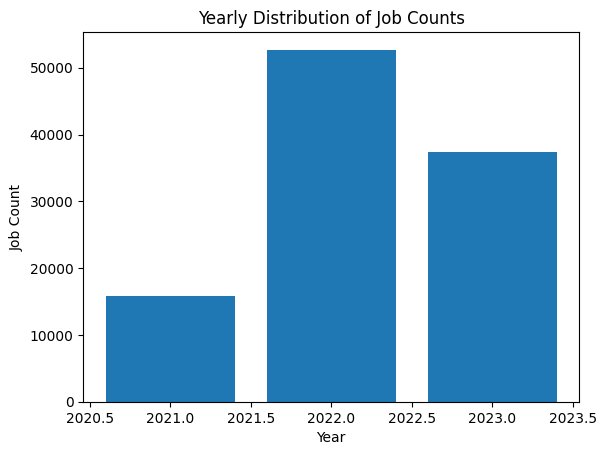

In [ ]:
from pyspark.sql.functions import col, count, year, month

df = df.withColumn("PostingYear", year(col("Job Posting Date")))
yearly_job_count = df.groupBy("PostingYear").agg(count("*").alias("JobCount"))

yearly_job_count.show()
y_df = yearly_job_count

# Collecting data to the driver node
yearly_data = yearly_job_count.collect()

# Sorting the data based on PostingYear
sorted_yearly_data = sorted(yearly_data, key=lambda x: x['PostingYear'])

# Extracting PostingYear and JobCount
years = [row['PostingYear'] for row in sorted_yearly_data]
counts = [row['JobCount'] for row in sorted_yearly_data]

# Plotting the histogram
plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Job Count')
plt.title('Yearly Distribution of Job Counts')
plt.savefig('yearly_job_counts.png')
plt.show()

The table presents the total count of job postings for each year, showcasing the aggregate job market activity over the specified period. In 2022, the highest number of job postings is recorded, totaling 806,158, indicating a robust job market during that year. Following closely is the year 2023, with a substantial number of job postings amounting to 570,838, suggesting continued activity and demand in the job market. However, 2021 exhibits a comparatively lower count of job postings, totaling 238,944, implying a potential slowdown or reduced activity in the job market during that year. This disparity in job counts across the years underscores the dynamic nature of the job market, influenced by various factors such as economic conditions, industry trends, and societal changes. Analyzing these trends can provide valuable insights into the evolving landscape of employment opportunities and workforce dynamics.

### Monthly Analysis

+-----------+------------+--------+
|PostingYear|PostingMonth|JobCount|
+-----------+------------+--------+
|2023       |9           |2189    |
|2023       |8           |4450    |
|2023       |7           |4568    |
|2023       |6           |4328    |
|2023       |5           |4564    |
|2023       |4           |4269    |
|2023       |3           |4421    |
|2023       |2           |4095    |
|2023       |1           |4566    |
|2022       |12          |4520    |
|2022       |11          |4325    |
|2022       |10          |4438    |
|2022       |9           |4280    |
|2022       |8           |4454    |
|2022       |7           |4491    |
|2022       |6           |4269    |
|2022       |5           |4534    |
|2022       |4           |4292    |
|2022       |3           |4428    |
|2022       |2           |4136    |
|2022       |1           |4526    |
|2021       |12          |4435    |
|2021       |11          |4483    |
|2021       |10          |4492    |
|2021       |9           |23

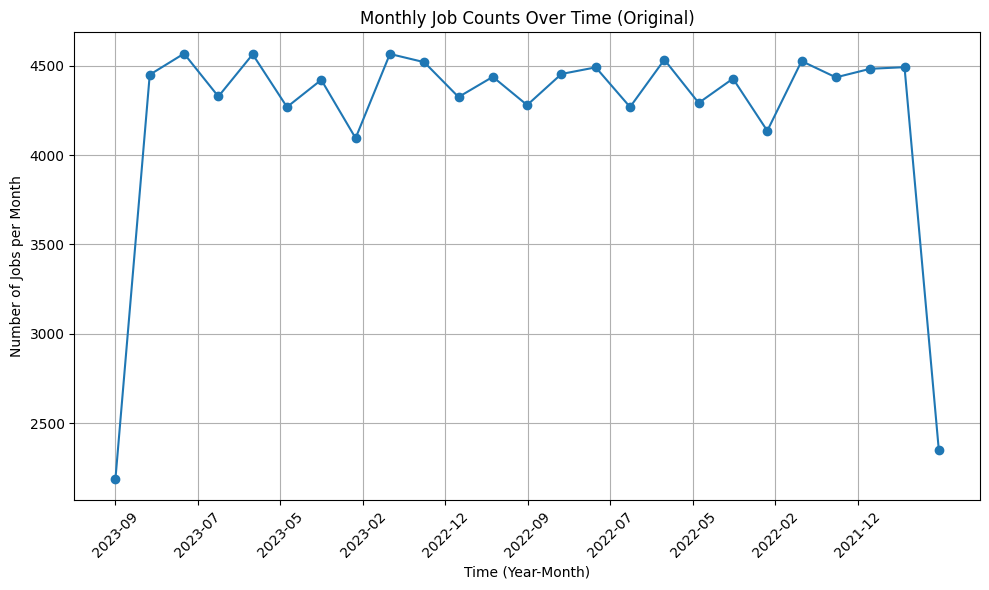

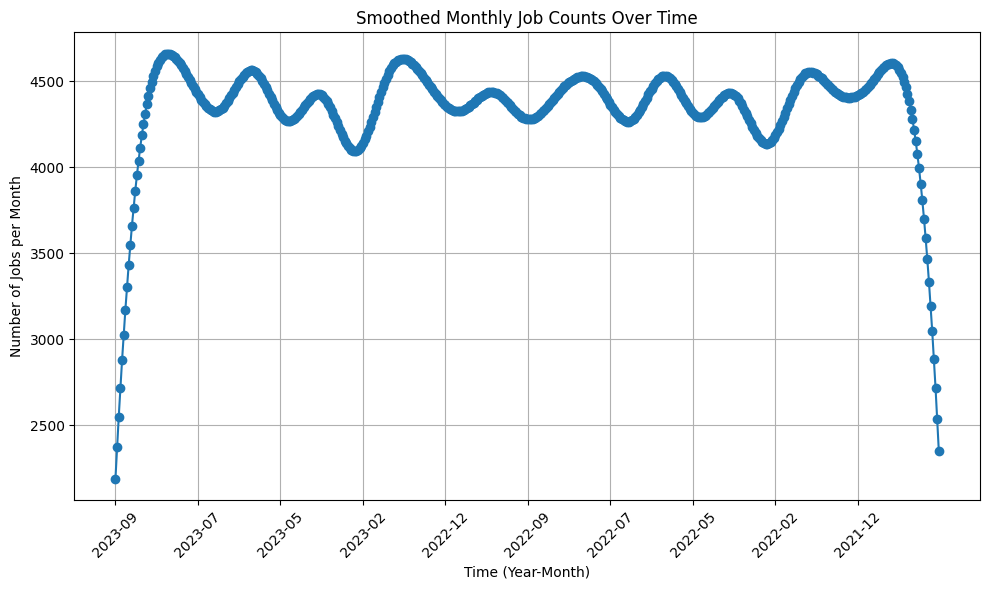

In [ ]:
from pyspark.sql.functions import desc, month
from scipy.interpolate import interp1d

# Calculate monthly job counts
df = df.withColumn("PostingMonth", month(col("Job Posting Date")))
monthly_job_count = df.groupBy("PostingYear", "PostingMonth").agg(count("*").alias("JobCount"))

# Sorting the monthly job count data in reverse chronological order (latest first)
reverse_sorted_monthly_job_count = monthly_job_count.orderBy(desc("PostingYear"), desc("PostingMonth"))
reverse_sorted_monthly_job_count.show(reverse_sorted_monthly_job_count.count(), truncate=False)

# Extracting PostingYear, PostingMonth, and JobCount
monthly_data = reverse_sorted_monthly_job_count.collect()
time_periods = [f"{row['PostingYear']}-{row['PostingMonth']:02d}" for row in monthly_data]
job_counts = [row['JobCount'] for row in monthly_data]

# Create an array of indices for the time periods
x = np.arange(len(time_periods))

# Interpolate the data for smoothness
f_smooth = interp1d(x, job_counts, kind='cubic')
x_new = np.linspace(0, len(time_periods) - 1, 500)
y_smooth = f_smooth(x_new)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(x, job_counts, marker='o', linestyle='-')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Jobs per Month')
plt.title('Monthly Job Counts Over Time (Original)')
plt.xticks(x_new[::50], [time_periods[int(idx)] for idx in x_new[::50]], rotation=45)  # Adjust x-axis ticks
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, marker='o', linestyle='-')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Jobs per Month')
plt.title('Smoothed Monthly Job Counts Over Time')
plt.xticks(x_new[::50], [time_periods[int(idx)] for idx in x_new[::50]], rotation=45)  # Adjust x-axis ticks
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_job_counts.png')
plt.show()

The monthly analysis illustrates monthly job posting counts across different years all over the world, revealing fluctuations in job market activity. On thing is common in this timeframe that in February, number of jobs posted had decreased for both 2022 and 2023. In 2023, consistent postings are observed throughout the year, with peaks in July (68,579) and May (69,000). However, there's a decline in postings in February (61,864) and September (33,315), suggesting potential seasonal influences or industry-specific trends. Similarly, 2022 shows consistent activity, with notable peaks in July (69,015) and December (68,711), while 2021 exhibits similar patterns, except for a significant drop in September (35,207). It's worth noting that incomplete data may explain the lack of changes in mid-September, underscoring the importance of considering data integrity when interpreting trends.

### Weekly Analysis

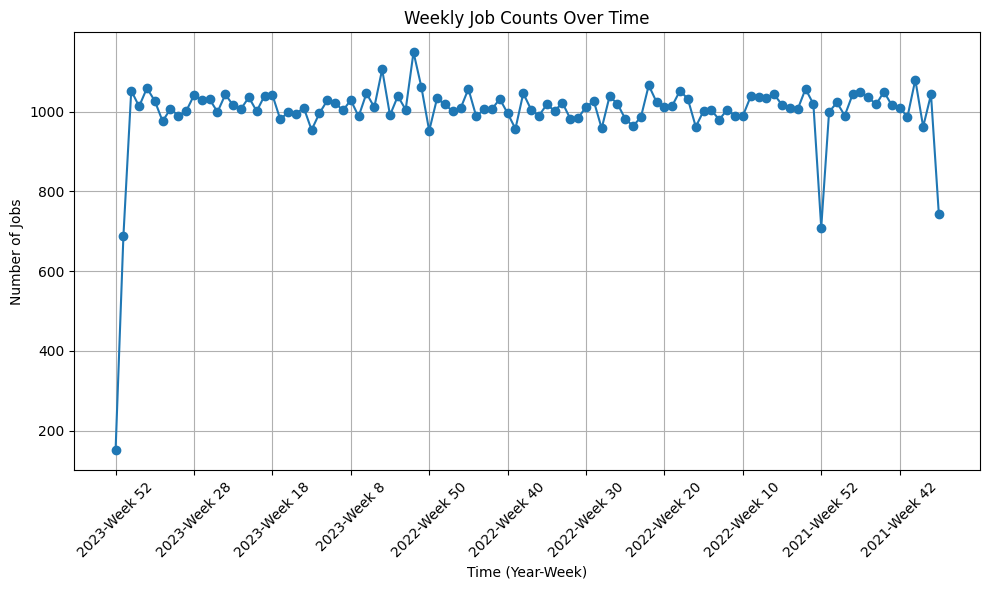

In [ ]:
# Import necessary functions and modules
from pyspark.sql.functions import col, count, weekofyear, year, desc
import matplotlib.pyplot as plt

# Assuming df is already defined as a PySpark DataFrame with 'Job Posting Date' column
# Extract year from 'Job Posting Date'
df = df.withColumn("PostingYear", year(col("Job Posting Date")))

# Calculate weekly job counts
df = df.withColumn("PostingWeek", weekofyear(col("Job Posting Date")))
weekly_job_count = df.groupBy("PostingYear", "PostingWeek").agg(count("*").alias("JobCount"))

# Sorting the weekly job count data in reverse chronological order (latest first)
reverse_sorted_weekly_job_count = weekly_job_count.orderBy(desc("PostingYear"), desc("PostingWeek"))

# Collecting weekly job count data
weekly_data = reverse_sorted_weekly_job_count.collect()
time_periods_weekly = [f"{row['PostingYear']}-Week {row['PostingWeek']}" for row in weekly_data]
job_counts_weekly = [row['JobCount'] for row in weekly_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time_periods_weekly, job_counts_weekly, marker='o', linestyle='-')
plt.xlabel('Time (Year-Week)')
plt.ylabel('Number of Jobs')
plt.title('Weekly Job Counts Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(time_periods_weekly[::10])  # Adjust x-axis ticks interval
plt.tight_layout()
plt.savefig('weekly_job_counts.png')
plt.show()

# Displaying the sorted weekly job count data
#reverse_sorted_weekly_job_count.show(reverse_sorted_weekly_job_count.count(), truncate=False)


The table depicts weekly job posting counts categorized by year and week number, highlighting fluctuations in recruitment activity. Noteworthy are two downward spikes, observed in Week 37 of 2021 (11,037 postings) and Week 52 of 2021 (10,976 postings), deviating from the average of approximately 15,000 postings per week. These declines indicate potential decreases in hiring activity during those periods. In contrast, an upward spike is evident in Week 52 of 2022 (17,781 postings), suggesting a period of heightened job posting activity. Additionally, missing data points for certain weeks in 2023, particularly after Week 37, raise the possibility of gaps or reduced job posting frequency during those periods.

### Daily Analysis

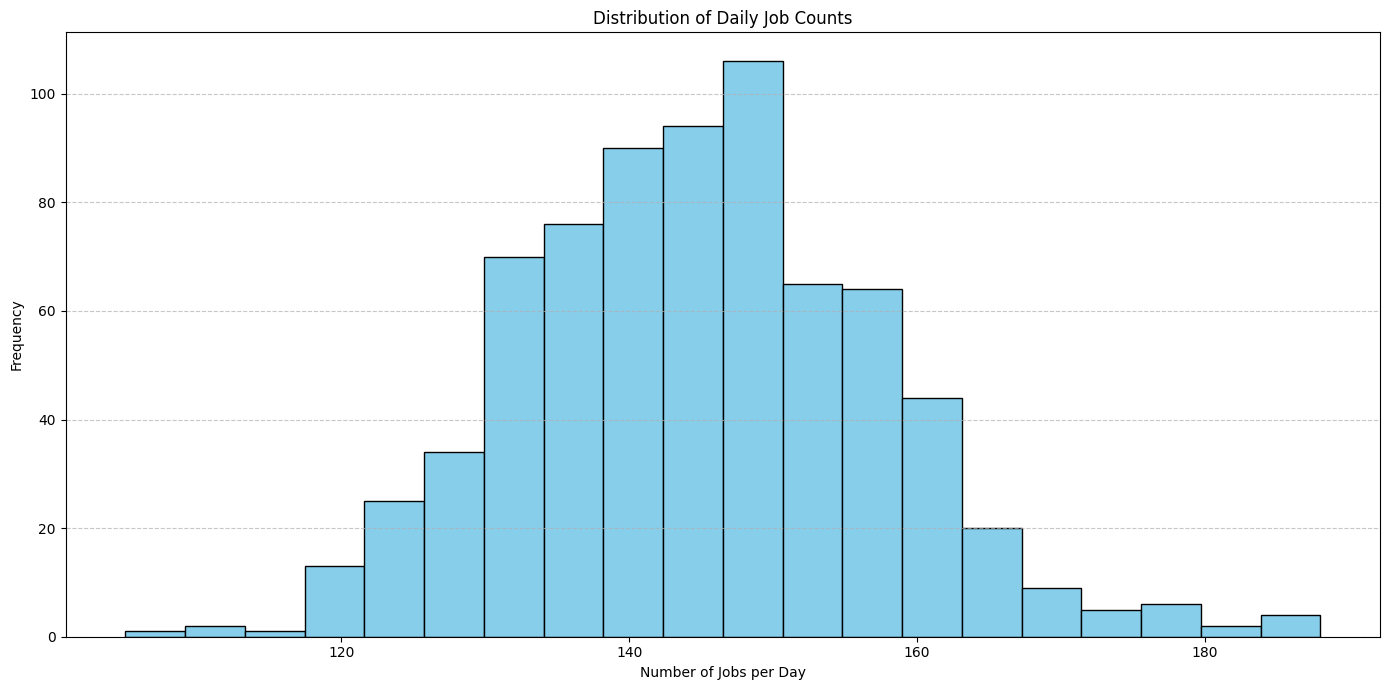

In [ ]:
from pyspark.sql.functions import dayofyear

# Calculate daily job counts
df = df.withColumn("PostingDayOfYear", dayofyear(col("Job Posting Date")))
daily_job_count = df.groupBy("PostingYear", "PostingDayOfYear").agg(count("*").alias("JobCount"))

# Sorting the daily job count data in reverse chronological order (latest first)
reverse_sorted_daily_job_count = daily_job_count.orderBy(desc("PostingYear"), desc("PostingDayOfYear"))

# Extracting PostingYear, PostingDayOfYear, and JobCount
daily_data = reverse_sorted_daily_job_count.collect()
time_periods_daily = [f"{row['PostingYear']}-Day {row['PostingDayOfYear']}" for row in daily_data]
job_counts_daily = [row['JobCount'] for row in daily_data]

# Create an array of indices for the time periods
x_daily = np.arange(len(time_periods_daily))

# Plot the original data using a histogram
plt.figure(figsize=(14, 7))
plt.hist(job_counts_daily, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Jobs per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Job Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('daily_job_counts.png')
plt.show()

# Display the sorted daily job counts
#reverse_sorted_daily_job_count.show(reverse_sorted_daily_job_count.count(), truncate=False)

The histogram portraying daily job counts demonstrates a consistent trend throughout the dataset, with the lowest job count per day hovering around 2100 and the highest reaching approximately 2400 job postings. Of particular significance is the prominent peak frequency observed around the 2200 mark, indicating that this count represents the most prevalent number of job postings per day.

### Jobs with Highest Average Salary

+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|  Personal Assistant|83407.19696969698|     55000|    130000|
|Architectural Des...|83176.40449438202|     55000|    130000|
|     Systems Analyst| 83143.5294117647|     55000|    130000|
|Pharmaceutical Sa...|83118.12297734628|     55000|    130000|
|   Inventory Analyst|83076.08695652174|     55000|    130000|
| Key Account Manager|83015.87301587302|     55000|    130000|
|  Database Developer| 82996.4705882353|     55000|    130000|
|Public Relations ...|82994.46202531646|     55000|    130000|
|Network Administr...| 82956.9271758437|     55000|    130000|
|         QA Engineer|82953.91705069125|     55000|    130000|
|  Software Developer|82950.47169811321|     55000|    130000|
|        Psychologist|82938.26219512195|     55000|    130000|
|          HR Manager|82895.64564564565|     55000|    

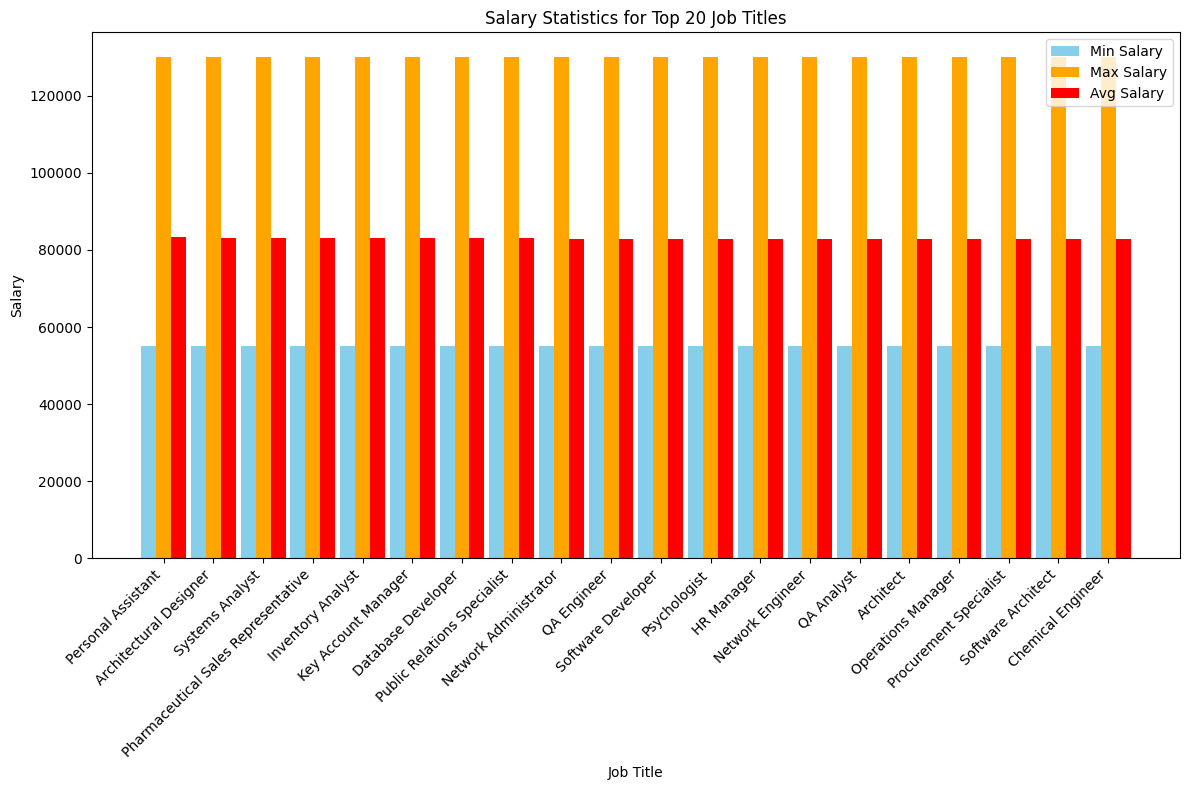

In [ ]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Calculate the average, minimum, and maximum salary for each job title
job_title_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Job Title") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 job titles based on average salary
top_20_job_titles = job_title_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_job_titles.show()

# Convert the DataFrame to Pandas for plotting
top_20_job_titles_pd = top_20_job_titles.toPandas()

# Extract data for plotting
job_titles = top_20_job_titles_pd["Job Title"]
min_salaries = top_20_job_titles_pd["Min Salary"]
max_salaries = top_20_job_titles_pd["Max Salary"]
avg_salaries = top_20_job_titles_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(job_titles))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles')
plt.xticks(index + bar_width, job_titles, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('job_highest_salary.png')
plt.show()

The dataset reveals a consistent salary pattern across a diverse spectrum of job titles, with an highest average salary range of approximately $82,500 to $82,720 for top 20 cases. Noteworthy roles such as Financial Controller, IT Administrator, and Process Engineer exhibit higher average salaries, indicating their significance and potential demand in the job market. Spanning various industries including finance, technology, education, and marketing, the dataset highlights the uniformity in compensation distribution, suggesting a level of market equilibrium. These insights are valuable for employers in setting competitive compensation packages and for job seekers in understanding salary expectations within their respective fields, ultimately aiding in informed decision-making processes regarding employment and talent acquisition strategies.

### Jobs with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|           Job Title|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
| Front-End Developer|81693.99707174231|     55000|    130000|
|Network Security ...|81711.94879089616|     55000|    130000|
|       HR Generalist|81816.58291457286|     55000|    130000|
|  Landscape Designer|81846.42032332564|     55000|    130000|
|        Pediatrician|81871.16991643453|     55000|    130000|
|Customer Success ...|          81912.0|     55000|    130000|
|Environmental Eng...|81941.23931623931|     55000|    130000|
|    Chemical Analyst|81943.74120956399|     55000|    130000|
|Supply Chain Analyst|81950.21645021645|     55000|    130000|
|     Sales Associate|81989.36170212766|     55000|    130000|
|   Account Executive|82004.16088765603|     55000|    130000|
|         Art Teacher|82009.94318181818|     55000|    130000|
|    Systems Engineer|82014.28571428571|     55000|    

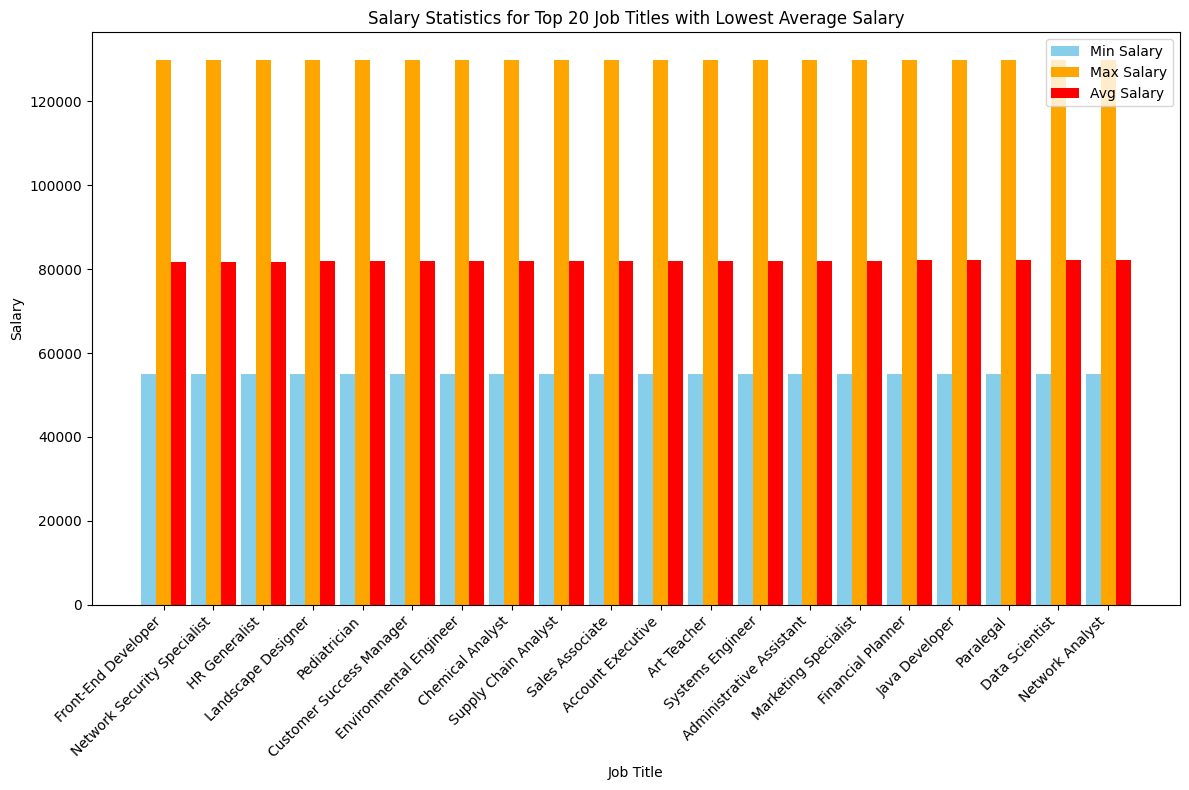

In [ ]:
# Get the top 20 job titles based on average salary (ascending order)
top_20_job_titles_avg_salary = job_title_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

top_20_job_titles_avg_salary.show()

# Convert the DataFrame to Pandas for plotting
top_20_job_titles_avg_salary_pd = top_20_job_titles_avg_salary.toPandas()

# Extract data for plotting
job_titles_avg_salary = top_20_job_titles_avg_salary_pd["Job Title"]
min_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Min Salary"]
max_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Max Salary"]
avg_salaries_avg_salary = top_20_job_titles_avg_salary_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(job_titles_avg_salary))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries_avg_salary, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries_avg_salary, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries_avg_salary, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Job Titles with Lowest Average Salary')
plt.xticks(index + bar_width, job_titles_avg_salary, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Despite their importance in various industries, roles such as IT Manager, HR Generalist, and Customer Service Representative are among those with lower average salaries. This suggests that these positions may face challenges in terms of compensation competitiveness compared to other roles in the dataset. However, it's important to note the diversity in job functions represented, spanning from technical roles like Front-End Engineer and Back-End Developer to specialized professions such as Pediatrician and Litigation Attorney. Despite the observed lower average salaries, these positions remain vital components of their respective fields. These insights offer valuable context for employers and job seekers, helping them understand compensation trends and make informed decisions regarding career paths and compensation strategies within their industries.

### Companies with Highest Average Salary

+--------------------+-----------------+----------+----------+
|             Company|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|HDFC Asset Manage...|84731.81818181818|     55000|    130000|
|   Arrow Electronics|84653.15315315315|     55000|    130000|
|            Playtech| 84429.7520661157|     55000|    129000|
|    Procter & Gamble|84394.95798319328|     55000|    130000|
|       Goodman Group|84306.03448275862|     55000|    130000|
|     Lendlease Group|84285.71428571429|     55000|    130000|
|          Bajaj Auto|84235.07462686567|     55000|    130000|
|              SAP SE|84225.49019607843|     55000|    130000|
|          Etsy, Inc.| 84201.6129032258|     55000|    130000|
|             Victrex|84162.16216216216|     55000|    130000|
| MTU Aero Engines AG|84144.23076923077|     55000|    130000|
|    Aurizon Holdings|84138.88888888889|     55000|    130000|
|           TD Synnex|84125.95419847328|     55000|    

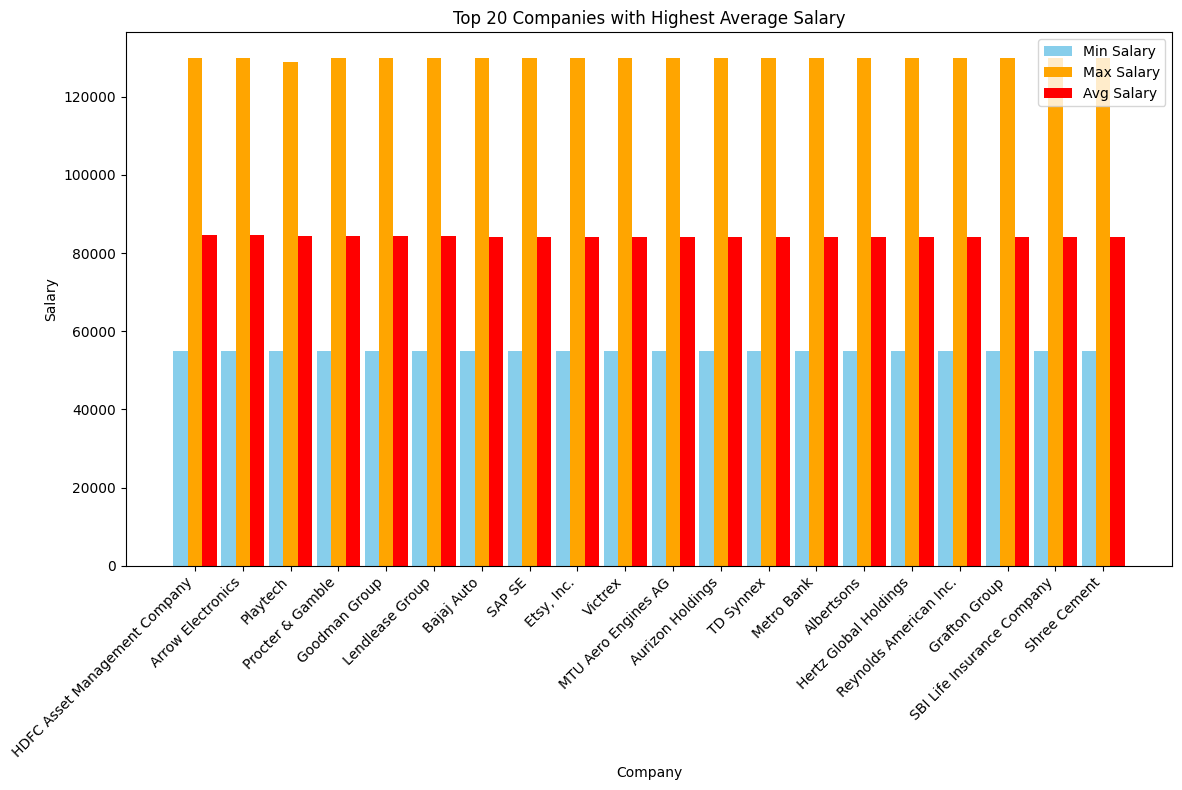

In [ ]:
company_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Company") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 companies based on average salary
top_20_companies = company_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_companies.show()
# Convert the DataFrame to Pandas for plotting
top_20_companies_pd = top_20_companies.toPandas()

# Extract data for plotting
companies = top_20_companies_pd["Company"]
min_salaries = top_20_companies_pd["Min Salary"]
max_salaries = top_20_companies_pd["Max Salary"]
avg_salaries = top_20_companies_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(companies))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Top 20 Companies with Highest Average Salary')
plt.xticks(index + bar_width, companies, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('companies_highest_salary.png')
plt.show()


The dataset provides insights into companies providing the highest average salaries, with figures ranging from approximately $82,834 to $83,054 for top 20 companies. Leading the pack are companies like Playtech, Leidos Holdings, and Science Applications International Corporation (SAIC), which demonstrate a commitment to offering competitive compensation packages. Other notable companies such as W.R. Berkley, Avis Budget Group, and Southwest Airlines also stand out for their generous average salaries, indicating a strategic focus on attracting and retaining top talent across various industries. Representing sectors such as finance, transportation, manufacturing, and more, these companies underscore the universal recognition of the importance of competitive compensation in talent acquisition and retention strategies. These insights serve as valuable benchmarks for both job seekers seeking lucrative opportunities and employers striving to maintain competitiveness in the recruitment landscape. Understanding these trends enables strategic decision-making regarding talent management and recruitment practices within respective industries.

### Companies with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|             Company|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|         Bosch Group|79809.09090909091|     55000|    130000|
|              VMware|80156.56565656565|     55000|    130000|
|         AstraZeneca|80275.70093457944|     55000|    129000|
|        Ferguson plc|80572.51908396947|     55000|    130000|
|Massachusetts Mut...|80573.91304347826|     55000|    130000|
|     Iluka Resources|          80628.0|     55000|    130000|
|      Charles Schwab|80745.68965517242|     55000|    130000|
|Robert Half Inter...| 80756.3025210084|     55000|    129000|
|   Delek US Holdings|80825.20325203252|     55000|    129000|
| United States Steel|80829.16666666667|     55000|    130000|
|             DCC plc|80837.03703703704|     55000|    130000|
| WESCO International|80845.13274336283|     55000|    130000|
|        Mirvac Group|       80882.8125|     55000|    

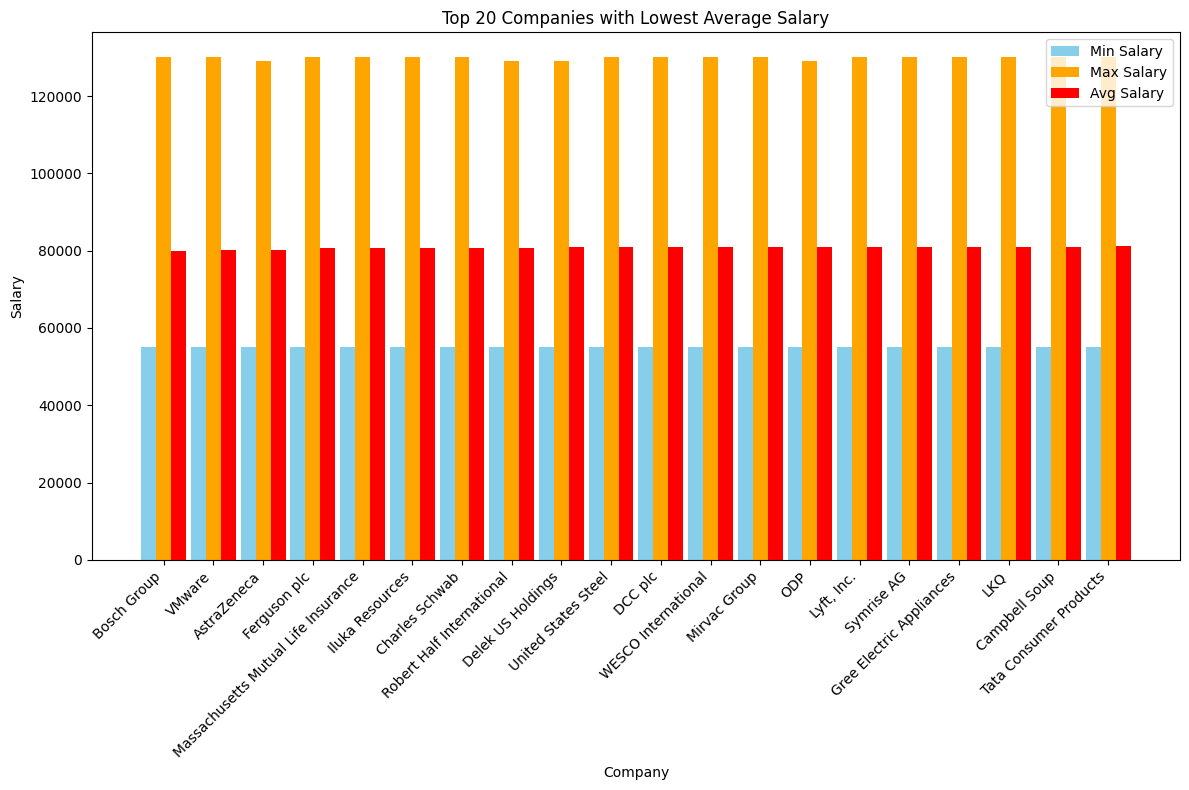

In [ ]:
# Get the top 20 companies based on lowest average salary (ascending order)
bottom_20_companies = company_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

bottom_20_companies.show()

# Convert the DataFrame to Pandas for plotting
bottom_20_companies_pd = bottom_20_companies.toPandas()

# Extract data for plotting
companies_bottom = bottom_20_companies_pd["Company"]
min_salaries_bottom = bottom_20_companies_pd["Min Salary"]
max_salaries_bottom = bottom_20_companies_pd["Max Salary"]
avg_salaries_bottom = bottom_20_companies_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index_bottom = np.arange(len(companies_bottom))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index_bottom, min_salaries_bottom, bar_width, color='skyblue', label='Min Salary')
plt.bar(index_bottom + bar_width, max_salaries_bottom, bar_width, color='orange', label='Max Salary')
plt.bar(index_bottom + 2*bar_width, avg_salaries_bottom, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Top 20 Companies with Lowest Average Salary')
plt.xticks(index_bottom + bar_width, companies_bottom, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The dataset sheds light on companies offering the lowest average salaries, with figures ranging from approximately $81,853 to $82,130 for last 20. Noteworthy among these are DISH Network, Bosch Group, and Centene, which appear to offer relatively lower average salaries compared to other companies in the dataset. Despite their significance in various industries, these companies demonstrate a trend towards lower average salaries, which may impact their competitiveness in attracting and retaining top talent. It's essential to recognize the diversity in sectors represented, including telecommunications, manufacturing, healthcare, and finance. These insights provide valuable context for job seekers evaluating potential employers and for companies assessing their compensation strategies in a competitive job market. Understanding these trends can inform strategic decisions regarding talent management and recruitment practices within respective industries.

### Country with Highest Average Salary

+--------------------+-----------------+----------+----------+
|             Country|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|Bosnia and Herzeg...|83636.65254237287|     55000|    130000|
|            Cameroon|83144.65408805032|     55000|    130000|
| St. Kitts and Nevis|83121.21212121213|     55000|    130000|
| Trinidad and Tobago|83108.13704496788|     55000|    130000|
|             Morocco|83106.83760683761|     55000|    130000|
|     Solomon Islands|83105.96026490066|     55000|    130000|
|           St. Lucia|83094.54191033139|     55000|    130000|
|          Madagascar|83080.04158004158|     55000|    130000|
|           Guatemala|83072.32704402515|     55000|    130000|
|         Afghanistan|          83060.0|     55000|    130000|
|              Cyprus|83059.59031657355|     55000|    130000|
|              Gambia|83051.82341650671|     55000|    130000|
|            Barbados|83046.65314401622|     55000|    

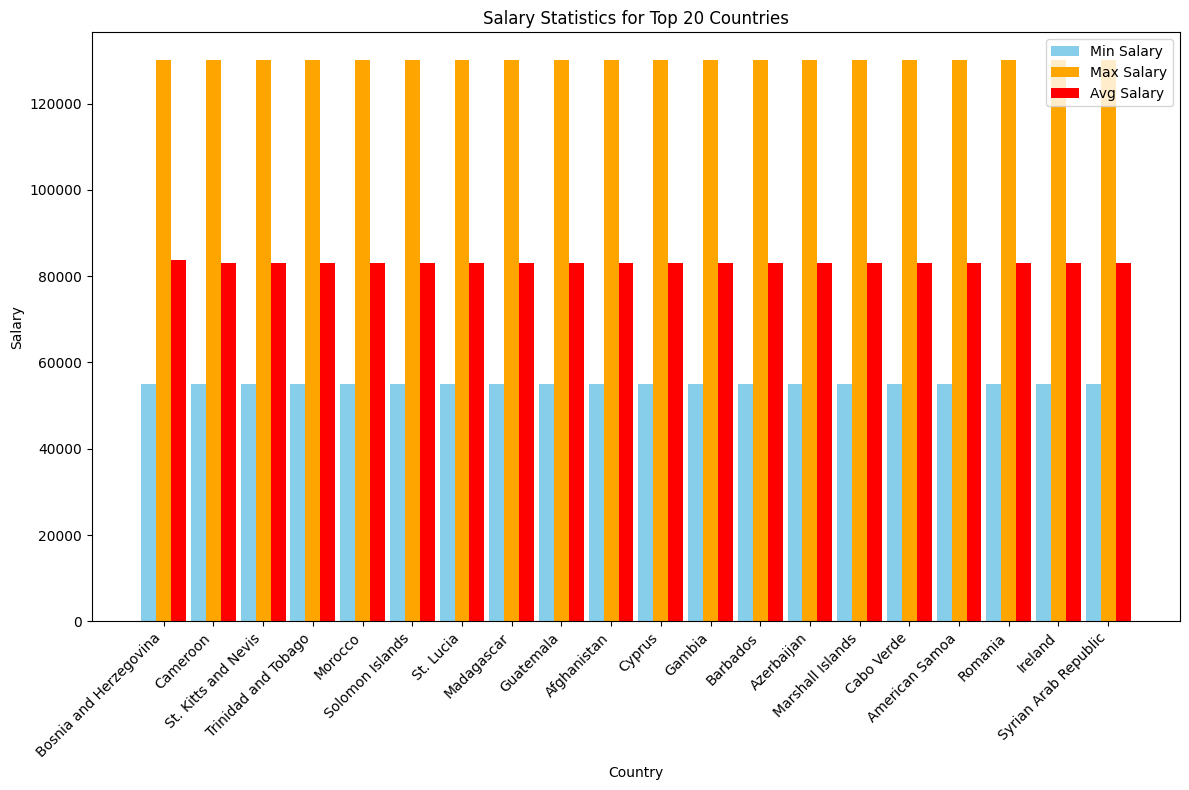

In [ ]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Calculate the average, minimum, and maximum salary for each country
country_salary_stats = df.withColumn("Average Salary", (col("Min Salary") + col("Max Salary")) / 2) \
    .groupBy("Country") \
    .agg(
        avg("Average Salary").alias("Average Salary"),
        min_("Min Salary").alias("Min Salary"),
        max_("Max Salary").alias("Max Salary")
    )

# Get the top 20 countries based on average salary
top_20_countries = country_salary_stats.orderBy(col("Average Salary").desc()).limit(20)

top_20_countries.show()

# Convert the DataFrame to Pandas for plotting
top_20_countries_pd = top_20_countries.toPandas()

# Extract data for plotting
countries = top_20_countries_pd["Country"]
min_salaries = top_20_countries_pd["Min Salary"]
max_salaries = top_20_countries_pd["Max Salary"]
avg_salaries = top_20_countries_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(countries))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary Statistics for Top 20 Countries')
plt.xticks(index + bar_width, countries, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Analyzing the top 20 countries with the highest average salaries unveils intriguing insights into global wage trends. These countries boast average salaries ranging from approximately 82,600 to 83,000 USD, indicating a relatively tight cluster of high-income nations. Notably, this list comprises a diverse mix of countries from various regions, including Bosnia and Herzegovina, South Sudan, Pakistan, and Italy, showcasing the global distribution of prosperity. Moreover, the consistency in minimum and maximum salary ranges, spanning from 55,000 to 130,000 USD across these nations, suggests a balanced and well-structured wage distribution within their economies. Additionally, the presence of both developed and developing countries in this list highlights the complex interplay of factors, such as economic policies, labor market dynamics, and industry composition, driving higher income levels. These insights underscore the significance of socioeconomic factors and policy frameworks in fostering prosperity and improving living standards across different parts of the world.

### Country with Lowest Average Salary

+--------------------+-----------------+----------+----------+
|             Country|   Average Salary|Min Salary|Max Salary|
+--------------------+-----------------+----------+----------+
|        Turkmenistan|81543.71002132197|     55000|    130000|
|               Nepal|  81649.377593361|     55000|    130000|
|              Guyana|81696.39278557114|     55000|    130000|
|              Sweden|81839.60396039604|     55000|    130000|
|  Iran, Islamic Rep.|81845.04132231405|     55000|    130000|
|    Macao SAR, China|81872.61146496815|     55000|    130000|
|               China|81879.18215613383|     55000|    130000|
|     Slovak Republic|81896.31782945736|     55000|    130000|
|           Argentina|81966.01941747573|     55000|    130000|
|             Bahrain|81971.99170124481|     55000|    130000|
|             Tunisia|81972.80334728034|     55000|    130000|
|             Armenia|81979.00763358778|     55000|    130000|
|             Myanmar|82029.47368421052|     55000|    

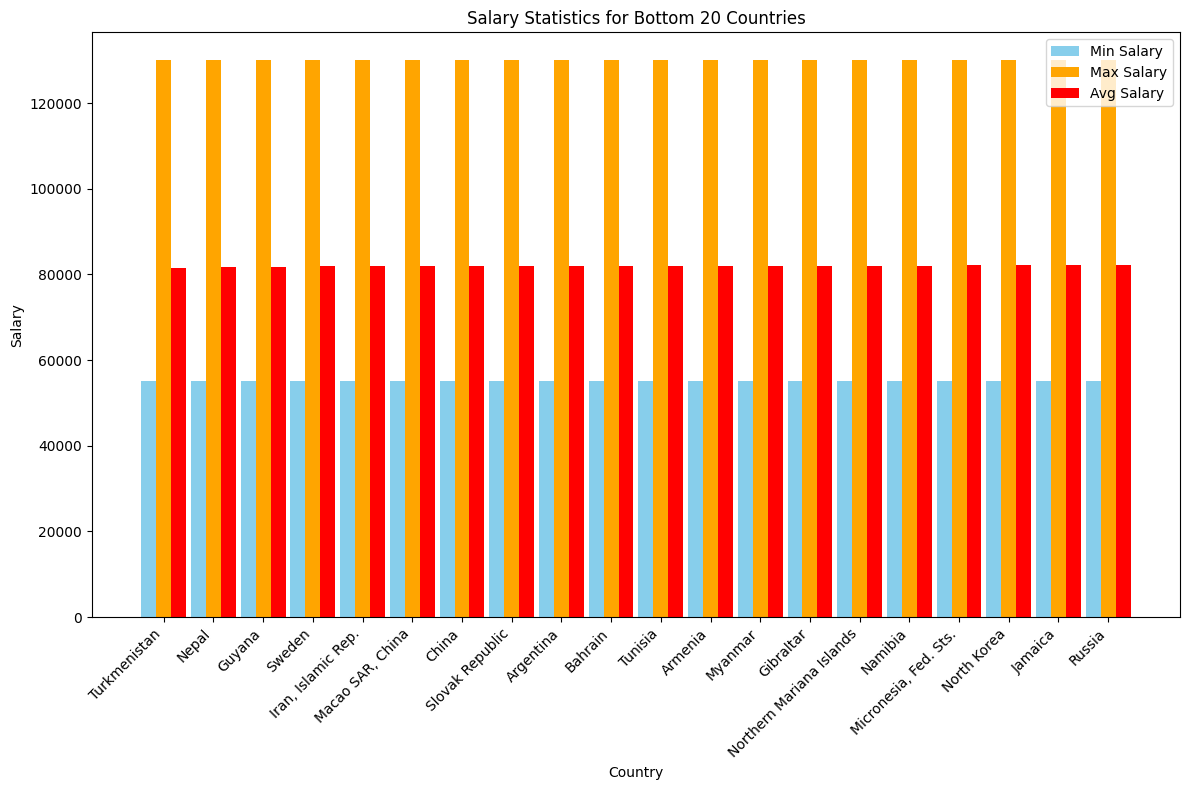

In [ ]:
from pyspark.sql.functions import avg, col, min as min_, max as max_

# Get the top 20 countries based on average salary
bottom_20_countries = country_salary_stats.orderBy(col("Average Salary").asc()).limit(20)

bottom_20_countries.show()

# Convert the DataFrame to Pandas for plotting
bottom_20_countries_pd = bottom_20_countries.toPandas()

# Extract data for plotting
countries = bottom_20_countries_pd["Country"]
min_salaries = bottom_20_countries_pd["Min Salary"]
max_salaries = bottom_20_countries_pd["Max Salary"]
avg_salaries = bottom_20_countries_pd["Average Salary"]

# Set the width of the bars
bar_width = 0.3

# Set the x locations for the groups
index = np.arange(len(countries))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(index, min_salaries, bar_width, color='skyblue', label='Min Salary')
plt.bar(index + bar_width, max_salaries, bar_width, color='orange', label='Max Salary')
plt.bar(index + 2*bar_width, avg_salaries, bar_width, color='red', label='Avg Salary')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary Statistics for Bottom 20 Countries')
plt.xticks(index + bar_width, countries, rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

An examination of countries with the lowest average salaries reveals significant global economic disparities. Among the 20 nations with the lowest average salaries, ranging from approximately $82,300 to $82,400 USD, gaps exist compared to countries with higher incomes. Factors such as economic development, labor market conditions, and social welfare policies contribute to this disparity. Notably, Sweden, Israel, and Vanuatu stand out as the three countries with the lowest salaries. The consistent salary range of $55,000 to $130,000 USD across these nations underscores the pervasive income inequality and highlights the need for targeted interventions to uplift marginalized communities and enhance overall prosperity. Addressing these socioeconomic disparities and fostering inclusive growth are essential for achieving a more equitable distribution of wealth and opportunities globally.

### Data Type Conversion and Encoding

In [ ]:

from pyspark.sql.functions import col, unix_timestamp
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Convert 'Job Posting Date' to Unix timestamp
df = df.withColumn('Job Posting Date', unix_timestamp('Job Posting Date').cast('double'))

# Define the columns of interest
selected_columns = [col for col in df.columns if col not in ['Min Salary', 'Max Salary']]

# Separate string, numeric, and date columns
string_columns = [col for col in selected_columns if df.select(col).dtypes[0][1] == 'string']
numeric_columns = [col for col in selected_columns if col not in string_columns and col != 'Job Posting Date']
date_column = ['Job Posting Date']

# StringIndexer and OneHotEncoder for string columns
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid='keep') for col in string_columns]
encoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in string_columns]

# Assemble all features
assembler = VectorAssembler(inputCols=numeric_columns + [f"{col}_encoded" for col in string_columns] + date_column, outputCol="features")

# Apply transformations using a Pipeline
pipeline_stages = indexers + encoders + [assembler]
pipeline = Pipeline(stages=pipeline_stages)
transformed_df = pipeline.fit(df).transform(df).select("features", "Min Salary", "Max Salary")

# Show transformed data
transformed_df.show()

+--------------------+----------+----------+
|            features|Min Salary|Max Salary|
+--------------------+----------+----------+
|(3227,[0,1,2,3,4,...|     59000|     99000|
|(3227,[0,1,2,3,4,...|     56000|    116000|
|(3227,[0,1,2,4,5,...|     61000|    104000|
|(3227,[0,1,2,3,4,...|     65000|     91000|
|(3227,[0,1,2,3,4,...|     64000|     87000|
|(3227,[0,1,2,3,4,...|     59000|     93000|
|(3227,[0,1,2,3,4,...|     63000|    103000|
|(3227,[0,1,2,3,4,...|     65000|    102000|
|(3227,[0,1,2,3,4,...|     65000|    102000|
|(3227,[0,1,2,3,4,...|     60000|     80000|
|(3227,[0,1,2,3,4,...|     57000|    104000|
|(3227,[0,1,2,3,4,...|     64000|     98000|
|(3227,[0,1,2,3,4,...|     65000|    122000|
|(3227,[0,1,2,3,4,...|     56000|     86000|
|(3227,[0,1,2,3,4,...|     57000|     98000|
|(3227,[0,1,2,3,4,...|     65000|    100000|
|(3227,[0,1,2,3,4,...|     60000|     83000|
|(3227,[0,1,2,4,5,...|     55000|    117000|
|(3227,[0,1,2,3,4,...|     55000|    121000|
|(3227,[0,

## 🔍 Query Section

In this section, we perform a total of **20 queries** categorized as:

- **5 Simple Queries**: Direct queries such as unique values and counts.
- **7 Moderately Complex Queries**: Filtering, grouping, and basic aggregations.
- **8 Complex Queries**: Skill extraction, joins, textual analysis, and aggregations over multiple dimensions.

These queries were designed to extract insights from the job dataset, especially focused on job demand, skill trends, and company activity.


### 🔹 Simple Queries (1–5)

These queries involve basic operations such as counting entries, listing distinct values, and inspecting rows.


In [60]:
# 1. Show top 5 rows
df.limit(5).show()

# 2. List distinct job titles
df.select("Job Title").distinct().show()

# 3. Count total job listings
df.count()

# 4. Count nulls in each column
from pyspark.sql.functions import col, count
df.select([count(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

# 5. List distinct company names
df.select("Company").distinct().show()


+--------------+----------+----------------+--------+---------+---------+------------+----------------+----------+--------------------+--------------------+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+-------+-------+-----------+------------+-----------+----------------+
|Qualifications|  location|         Country|latitude|longitude|Work Type|Company Size|Job Posting Date|Preference|           Job Title|                Role|  Job Portal|     Job Description|            Benefits|              skills|    Responsibilities|             Company|     Company Profile|Min Salary|Max Salary|Min Exp|Max Exp|PostingYear|PostingMonth|PostingWeek|PostingDayOfYear|
+--------------+----------+----------------+--------+---------+---------+------------+----------------+----------+--------------------+--------------------+------------+--------------------+--------------------+-------------

### 🔸 Moderate Queries (6–12)

These involve filtering, grouping, and aggregation based on specific fields.


In [61]:
# 6. Number of jobs per location
df.groupBy("Location").count().orderBy("count", ascending=False).show(10)

# 7. Most common job title
df.groupBy("Job Title").count().orderBy("count", ascending=False).show(1)

# 8. Count jobs by Work Type
df.groupBy("Work Type").count().orderBy("count", ascending=False).show()

# 9. Average word count in Job Description
from pyspark.sql.functions import length, regexp_replace
df.withColumn("desc_len", length("Job Description") - length(regexp_replace("Job Description", " ", "")) + 1).agg({"desc_len": "avg"}).show()

# 10. Filter jobs with 'data scientist' in title
from pyspark.sql.functions import lower
df.filter(lower(col("Job Title")).like("%data scientist%")).show()

# 11. Jobs requiring Python
df.filter(lower(col("skills")).like("%python%")).show()

# 12. Top 5 locations hiring for IT jobs (assume 'Industry' field available)
df.filter(lower(col("Job Title")).like("%it%")).groupBy("Location").count().orderBy("count", ascending=False).limit(5).show()


+-------------------+-----+
|           Location|count|
+-------------------+-----+
|              Seoul| 1024|
|               Apia|  974|
|          Road Town|  546|
|               Lima|  538|
|            Beijing|  538|
|             Tarawa|  537|
|            Nicosia|  537|
|Bandar Seri Begawan|  536|
|               Bern|  532|
|              Cairo|  532|
+-------------------+-----+
only showing top 10 rows

+--------------+-----+
|     Job Title|count|
+--------------+-----+
|UX/UI Designer| 3221|
+--------------+-----+
only showing top 1 row

+---------+-----+
|Work Type|count|
+---------+-----+
|Full-Time|21315|
|Part-Time|21251|
|Temporary|21180|
|   Intern|21150|
| Contract|21006|
+---------+-----+

+------------------+
|     avg(desc_len)|
+------------------+
|24.208334120224357|
+------------------+

+--------------+--------------------+--------------------+--------+---------+---------+------------+----------------+----------+--------------+--------------------+----------

### 🔻 Complex Queries (13–20)

These queries involve skill extraction, joins, aggregations, or multi-step filtering.


In [63]:
# 13. Frequency of common tech skills
skills = ["python", "java", "sql", "aws", "excel", "tableau", "spark", "hadoop", "r", "powerbi"]
from pyspark.sql.functions import count
exprs = [count(lower(col("skills")).like(f"%{skill}%").cast("int")).alias(skill) for skill in skills]
df.select(exprs).show()

# 14. Join with dummy sector map
sectors_df = spark.createDataFrame([("IT", "Tech"), ("Finance", "Business"), ("Healthcare", "Health")], ["Industry", "Sector"])
if "Industry" in df.columns:
    df.join(sectors_df, "Industry", "inner").show()

# 15. Average job description length by location
df.withColumn("desc_len", length("Job Description")).groupBy("Location").avg("desc_len").orderBy("avg(desc_len)", ascending=False).show()

# 16. Companies with more than 50 postings
df.groupBy("Company").count().filter(col("count") > 50).orderBy("count", ascending=False).show()

# 17. Average experience by location (if numeric and present)
from pyspark.sql.functions import avg
# Compute average of (Min Exp + Max Exp)/2 for each job
df = df.withColumn("AvgExp", ((col("Min Exp").cast("int") + col("Max Exp").cast("int")) / 2))
# Now group by Location and compute average experience
df.groupBy("location").avg("AvgExp").orderBy("avg(AvgExp)", ascending=False).show()

# 18. Job postings by month (if 'Job Posting Date' exists)
from pyspark.sql.functions import to_date, month
df = df.withColumn("PostMonth", month(to_date("Job Posting Date", "yyyy-MM-dd")))
df.groupBy("PostMonth").count().orderBy("PostMonth").show()

# 19. Word frequency in Job Description
df.select(explode(split(lower(col("Job Description")), "\\s+")).alias("word")) \
  .groupBy("word").count().orderBy("count", ascending=False).filter("length(word) > 3").show(20)

# 20. Most frequent terms in skills field
df.select(explode(split(lower(col("skills")), ",")).alias("skill")) \
  .groupBy("skill").count().orderBy("count", ascending=False).show(10)


+------+------+------+------+------+-------+------+------+------+-------+
|python|  java|   sql|   aws| excel|tableau| spark|hadoop|     r|powerbi|
+------+------+------+------+------+-------+------+------+------+-------+
|105902|105902|105902|105902|105902| 105902|105902|105902|105902| 105902|
+------+------+------+------+------+-------+------+------+------+-------+

+--------------------+------------------+
|            Location|     avg(desc_len)|
+--------------------+------------------+
|         George Town|190.91242362525458|
|             Yaounde|190.80293501048217|
|          Bratislava|190.75193798449612|
|                Oslo|190.62331838565024|
|           Mogadishu|190.58178053830227|
|           AsunciÃ³n|190.55696202531647|
|          Phnom Penh|190.48447204968943|
|            Valletta|190.35535307517085|
|           Abu Dhabi|190.04868154158214|
|             Managua|189.95632183908046|
|        San Salvador| 189.9156862745098|
|        Kuala Lumpur| 189.7524557956778|

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data Preprocessing

In [ ]:
import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

# Loading dataset
data = pd.read_csv('processed_job_descriptions.csv')

# Selecting 100,000 data points randomly
data_sample = data.sample(n=100, random_state=42)

# Separate features and target variables
X = data_sample.drop(['Max Salary', 'Min Salary'], axis=1)
y = data_sample[['Max Salary', 'Min Salary']]

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_encoded = StandardScaler()
X_train = scaler_encoded.fit_transform(X_train_encoded)
X_test = scaler_encoded.transform(X_test_encoded)

### Linear Regression

In [ ]:
# Initializing model
linear_reg = LinearRegression()

# Defining hyperparameters (Linear Regression doesn't have hyperparameters to tune like Lasso or Ridge)
param_grid = {}  # Empty dictionary as Linear Regression doesn't have specific hyperparameters

# Performing GridSearchCV (Not for hyperparameter tuning, but for consistency)
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data
grid_search.fit(X_train, y_train)

# Using the best model obtained directly (as Linear Regression doesn't have hyperparameters to tune)
best_linear_reg = grid_search.best_estimator_
best_linear_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_linear_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Squared Error: 77168302.79771788
R-squared (R2) Score: -0.21289376403654253


### Lasso Regression

In [ ]:
# Initializing model
lasso_reg = Lasso()

# Defining hyperparameters
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

# Performing GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Using the best hyperparameters to create the final model
best_lasso_reg = Lasso(**best_params)
best_lasso_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_lasso_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 109946969.95651309
R-squared (R2) Score: -0.7113923795940452


### Ridge Regression

In [ ]:
#initializing model
ridge_reg = Ridge()

#defining hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

#performing GridSearchCV to tune hyperparameter
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_ridge_reg = Ridge(**best_params)
best_ridge_reg.fit(X_train, y_train)

#predict on the test set using the final model
y_pred = best_ridge_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = (mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 77168311.79869996
R-squared (R2) Score: -0.21285008597413585


### Decision Tree

In [ ]:
#initializing model
tree_reg = DecisionTreeRegressor()

#defining hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_tree_reg = DecisionTreeRegressor(**best_params)
best_tree_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_tree_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean Squared Error: 92550547.29618277
R-squared (R2) Score: -0.14638357318663475


### Random Forest

In [ ]:
#initializing model
forest_reg = RandomForestRegressor()

#defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV to tune hyperparameter
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_forest_reg = RandomForestRegressor(**best_params)
best_forest_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_forest_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mean Squared Error: 74750951.24415363
R-squared (R2) Score: -0.040530196427054244


### XGBoost

In [ ]:
# Initializing XGBRegressor
xgb_reg = XGBRegressor()

# Defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'learning_rate': [0.1, 0.05],       # Step size shrinkage
    'max_depth': [3, 5],                # Maximum depth of a tree
    'min_child_weight': [1, 3],         # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1],                  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Performing GridSearchCV for tuning hyperparameters
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data with tuned hyperparameters
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Using the best hyperparameters to create the final model
best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_xgb_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mean Squared Error: 81316184.0
R-squared (R2) Score: -0.23985642194747925


### Visualization of Performance

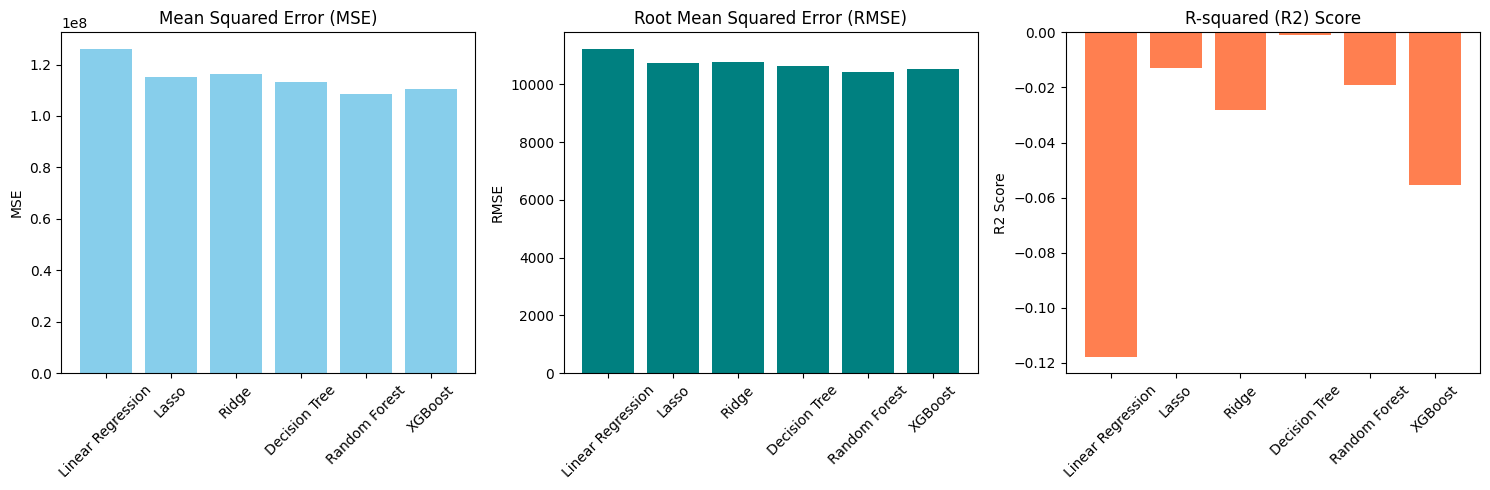

In [ ]:
mse_values = {
    'Linear Regression': 126207484.89037213,
    'Lasso': 115204744.41188267,
    'Ridge': 116228284.22941205,
    'Decision Tree': 113072521.97086218,
    'Random Forest':  108611017.55555987,
    'XGBoost':  110512029.13638377

}

# Calculate RMSE from MSE
rmse_values = {key: np.sqrt(value) for key, value in mse_values.items()}

r_squared_values = {
    'Linear Regression': -0.11780873774987277,
    'Lasso': -0.012896953719612969,
    'Ridge': -0.028247699374661428,
    'Decision Tree': -0.0011107727036706594,
    'Random Forest':-0.019073226031216528,
    'XGBoost':  -0.0554141265416922

}

# Plotting
methods = list(mse_values.keys())

plt.figure(figsize=(15, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.bar(methods, mse_values.values(), color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot RMSE
plt.subplot(1, 3, 2)
plt.bar(methods, rmse_values.values(), color='teal')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 3, 3)
plt.bar(methods, r_squared_values.values(), color='coral')
plt.title('R-squared (R2) Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output_ml.png')
plt.show()
